In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

In [3]:
df=pd.read_csv('Kerala_Fuel_Prices.csv')
df.head()

,Date,District,Fuel_Type,Price,Price_Change
0,01-01-2024,Alapuzha,Petrol,107.86,0.00
1,01-01-2024,Alapuzha,Diesel,96.77,0.00
2,01-01-2024,Ernakulam,Petrol,107.78,-0.11
3,01-01-2024,Ernakulam,Diesel,96.70,-0.10
4,01-01-2024,Idukki,Petrol,108.90,-0.59


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          13608 non-null  object 
 1   District      13608 non-null  object 
 2   Fuel_Type     13608 non-null  object 
 3   Price         13608 non-null  float64
 4   Price_Change  13608 non-null  float64
dtypes: float64(2), object(3)
memory usage: 531.7+ KB


# Description of the table 

In [9]:
df.describe()

,Price,Price_Change
count,13608.000000,13608.000000
mean,101.171768,-0.003967
std,5.626920,0.399452
min,93.330000,-3.380000
25%,95.390000,-0.160000
50%,101.920000,0.000000
75%,106.470000,0.170000
max,110.020000,3.500000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,13608.0,101.171768,5.626920,93.33,95.39,101.92,106.47,110.02
Price_Change,13608.0,-0.003967,0.399452,-3.38,-0.16,0.00,0.17,3.50


## Mean of price is 101.171768
## Minimum price is 93.33
## Maximum price is 110.02

In [15]:
df.size

68040

In [17]:
df.shape

(13608, 5)

# Data Cleaning

In [21]:
df.isnull().sum()

Date            0
District        0
Fuel_Type       0
Price           0
Price_Change    0
dtype: int64

In [23]:
df.duplicated().sum()

0

# Monthwise mean petrol across all district

In [27]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'Date' to Month period
df['Month'] = df['Date'].dt.to_period('M')

# Filter only Petrol rows
df_petrol = df[df['Fuel_Type'] == 'Petrol']

# Pivot table: Group by 'Month' and calculate the mean price for each district
pivot_petrol = df_petrol.pivot_table(values='Price', index='Month', columns='District', aggfunc='mean')

# Print the result
print(pivot_petrol)

District    Alapuzha   Ernakulam      Idukki      Kannur    Kasargod  \
Month                                                                  
2024-01   108.281613  107.714194  108.835806  108.108710  108.624839   
2024-02   108.304483  107.705517  108.863103  108.144138  108.622759   
2024-03   106.981290  106.550323  107.730968  106.808387  107.379677   
2024-04   106.094333  105.565000  106.628000  105.937667  106.449667   
2024-05   106.004516  105.555806  106.762903  105.913226  106.413226   
2024-06   106.007667  105.552667  106.575000  105.934667  106.450667   
2024-07   106.186452  105.616129  106.655806  105.896129  106.377742   
2024-08   106.154839  105.542258  106.677097  105.811613  106.475161   
2024-09   106.206333  105.550667  106.453000  105.937667  106.460333   
2024-10   106.184839  105.549032  106.803226  105.901935  106.411613   
2024-11   106.044667  105.581667  106.834667  105.972000  106.458000   
2024-12   106.036129  105.634194  106.567742  105.893226  106.44

# Monthwise mean diesel across all district

In [31]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert 'Date' to Month period
df['Month'] = df['Date'].dt.to_period('M')

# Filter only Diesel rows
df_diesel = df[df['Fuel_Type'] == 'Diesel']

# Pivot table: Group by 'Month' and calculate the mean price for each district
pivot_diesel = df_diesel.pivot_table(values='Price', index='Month', columns='District', aggfunc='mean')

# Print the result
print(pivot_diesel)

District   Alapuzha  Ernakulam     Idukki     Kannur   Kasargod     Kollam  \
Month                                                                        
2024-01   97.166774  96.636129  97.599355  97.032258  97.504516  97.905161   
2024-02   97.189655  96.629655  97.624828  97.059310  97.511034  97.859655   
2024-03   95.912903  95.509032  96.650000  95.833226  96.342581  96.769355   
2024-04   95.024000  94.558333  95.476667  94.938667  95.409000  95.761333   
2024-05   94.968387  94.615484  95.569677  94.905161  95.375484  95.830000   
2024-06   94.971333  94.548333  95.472000  94.946000  95.410667  95.833000   
2024-07   95.138387  94.513871  95.541935  94.894839  95.341290  95.771613   
2024-08   95.109032  94.539677  95.575484  94.813548  95.432258  95.811613   
2024-09   95.156667  94.533667  95.354333  94.932000  95.420000  95.819333   
2024-10   95.186452  94.543871  95.562903  94.905806  95.364194  95.676129   
2024-11   95.007000  94.560667  95.651333  94.977000  95.407000 

# Total count of petrol price change(Increase,Decrease,No Change)

In [42]:
# Filtering for Petrol only
petrol_data = df[df['Fuel_Type'] == 'Petrol'].copy()

# Converting Date column to datetime
petrol_data['Date'] = pd.to_datetime(petrol_data['Date'], format='%d-%m-%Y')

# Extracting year and month for grouping
petrol_data['YearMonth'] = petrol_data['Date'].dt.to_period('M')

# Categorizing price changes
def categorize_change(change):
    if change > 0:
        return 'Increase'
    elif change < 0:
        return 'Decrease'
    else:
        return 'No Change'

petrol_data['ChangeType'] = petrol_data['Price_Change'].apply(categorize_change)

# Grouping by District, YearMonth, and ChangeType to count occurrences
change_counts = petrol_data.groupby(['District', 'YearMonth', 'ChangeType']).size().unstack(fill_value=0)

# Ensuring all ChangeType columns exist
for change_type in ['Increase', 'Decrease', 'No Change']:
    if change_type not in change_counts.columns:
        change_counts[change_type] = 0

# Reordering columns for clarity
change_counts = change_counts[['Increase', 'Decrease', 'No Change']]

# Resetting index to make District and YearMonth regular columns
change_counts = change_counts.reset_index()

# Sorting by District and YearMonth for clarity
change_counts = change_counts.sort_values(['District', 'YearMonth'])

# Displaying the complete results
print("Monthly Petrol Price Change Counts by District (Alapuzha to Wayanad):")
print(change_counts.to_string(index=False))

Monthly Petrol Price Change Counts by District (Alapuzha to Wayanad):
         District YearMonth  Increase  Decrease  No Change
         Alapuzha   2024-01        13        12          6
         Alapuzha   2024-02        13        11          5
         Alapuzha   2024-03        12        14          5
         Alapuzha   2024-04        16        13          1
         Alapuzha   2024-05        15        13          3
         Alapuzha   2024-06        13        16          1
         Alapuzha   2024-07        14        14          3
         Alapuzha   2024-08        12        16          3
         Alapuzha   2024-09        10        13          7
         Alapuzha   2024-10        10        12          9
         Alapuzha   2024-11        14        10          6
         Alapuzha   2024-12        13        10          8
         Alapuzha   2025-01        12        15          4
         Alapuzha   2025-02        11        12          5
         Alapuzha   2025-03        15        

# Total count of diesel price change(Increase,Decrease,No Change)

In [44]:
# Filtering for Diesel only
diesel_data = df[df['Fuel_Type'] == 'Diesel'].copy()

# Converting Date column to datetime
diesel_data['Date'] = pd.to_datetime(diesel_data['Date'], format='%d-%m-%Y')

# Extracting year and month for grouping
diesel_data['YearMonth'] = diesel_data['Date'].dt.to_period('M')

# Categorizing price changes
def categorize_change(change):
    if change > 0:
        return 'Increase'
    elif change < 0:
        return 'Decrease'
    else:
        return 'No Change'

diesel_data['ChangeType'] = diesel_data['Price_Change'].apply(categorize_change)

# Grouping by District, YearMonth, and ChangeType to count occurrences
change_counts = diesel_data.groupby(['District', 'YearMonth', 'ChangeType']).size().unstack(fill_value=0)

# Ensuring all ChangeType columns exist
for change_type in ['Increase', 'Decrease', 'No Change']:
    if change_type not in change_counts.columns:
        change_counts[change_type] = 0

# Reordering columns for clarity
change_counts = change_counts[['Increase', 'Decrease', 'No Change']]

# Resetting index to make District and YearMonth regular columns
change_counts = change_counts.reset_index()

# Sorting by District and YearMonth for clarity
change_counts = change_counts.sort_values(['District', 'YearMonth'])

# Displaying the complete results
print("Monthly Diesel Price Change Counts by District (Alapuzha to Wayanad):")
print(change_counts.to_string(index=False))

Monthly Diesel Price Change Counts by District (Alapuzha to Wayanad):
         District YearMonth  Increase  Decrease  No Change
         Alapuzha   2024-01        13        12          6
         Alapuzha   2024-02        13        11          5
         Alapuzha   2024-03        12        14          5
         Alapuzha   2024-04        16        13          1
         Alapuzha   2024-05        15        13          3
         Alapuzha   2024-06        13        16          1
         Alapuzha   2024-07        14        14          3
         Alapuzha   2024-08        12        16          3
         Alapuzha   2024-09        10        13          7
         Alapuzha   2024-10         9        12         10
         Alapuzha   2024-11        14         9          7
         Alapuzha   2024-12        13        10          8
         Alapuzha   2025-01        12        15          4
         Alapuzha   2025-02        11        12          5
         Alapuzha   2025-03        14        

# Most Volatile change of petrol and diesel with date 

In [50]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Pivot the data to get Petrol and Diesel changes by district
pivot_df = df.pivot_table(
    values='Price_Change',
    index='Date',
    columns=['Fuel_Type', 'District'],
    aggfunc='sum',
    fill_value=0
)

# Flatten the multi-index columns for easier access
pivot_df.columns = [f"{fuel}_Price_Change_{district}" for fuel, district in pivot_df.columns]

# Identify petrol and diesel price change columns
petrol_change_cols = [col for col in pivot_df.columns if 'Petrol_Price_Change' in col]
diesel_change_cols = [col for col in pivot_df.columns if 'Diesel_Price_Change' in col]

# Sum of daily changes across all petrol columns
pivot_df['Total_Petrol_Change'] = pivot_df[petrol_change_cols].sum(axis=1)

# Sum of daily changes across all diesel columns
pivot_df['Total_Diesel_Change'] = pivot_df[diesel_change_cols].sum(axis=1)

# Most volatile day for petrol (max absolute change)
max_petrol_volatility_day = pivot_df.loc[pivot_df['Total_Petrol_Change'].abs().idxmax()]
print("Most volatile petrol price change day:")
print(max_petrol_volatility_day[['Total_Petrol_Change']].to_frame().transpose().assign(Date=max_petrol_volatility_day.name).reset_index(drop=True)[['Date', 'Total_Petrol_Change']])

# Most volatile day for diesel
max_diesel_volatility_day = pivot_df.loc[pivot_df['Total_Diesel_Change'].abs().idxmax()]
print("\nMost volatile diesel price change day:")
print(max_diesel_volatility_day[['Total_Diesel_Change']].to_frame().transpose().assign(Date=max_diesel_volatility_day.name).reset_index(drop=True)[['Date', 'Total_Diesel_Change']])

# Total increase and decrease in petrol prices
total_petrol_increase = pivot_df[petrol_change_cols][pivot_df[petrol_change_cols] > 0].sum().sum()
total_petrol_decrease = pivot_df[petrol_change_cols][pivot_df[petrol_change_cols] < 0].sum().sum()

# Total increase and decrease in diesel prices
total_diesel_increase = pivot_df[diesel_change_cols][pivot_df[diesel_change_cols] > 0].sum().sum()
total_diesel_decrease = pivot_df[diesel_change_cols][pivot_df[diesel_change_cols] < 0].sum().sum()

# Print results
print("\nTotal Petrol Price Movement:")
print(f"Increase: ₹{total_petrol_increase:.2f}")
print(f"Decrease: ₹{total_petrol_decrease:.2f}")

print("\nTotal Diesel Price Movement:")
print(f"Increase: ₹{total_diesel_increase:.2f}")
print(f"Decrease: ₹{total_diesel_decrease:.2f}")

Most volatile petrol price change day:
        Date  Total_Petrol_Change
0 2024-03-15               -29.28

Most volatile diesel price change day:
        Date  Total_Diesel_Change
0 2024-03-15               -24.36

Total Petrol Price Movement:
Increase: ₹872.24
Decrease: ₹-898.93

Total Diesel Price Movement:
Increase: ₹786.58
Decrease: ₹-813.87


# Total petrol and diesel price increase and decrease

In [54]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Pivot the data to get Petrol and Diesel changes by district
pivot_df = df.pivot_table(
    values='Price_Change',
    index='Date',
    columns=['Fuel_Type', 'District'],
    aggfunc='sum',
    fill_value=0
)

# Flatten the multi-index columns for easier access
pivot_df.columns = [f"{fuel}_Price_Change_{district}" for fuel, district in pivot_df.columns]

# Identify petrol and diesel price change columns
petrol_change_cols = [col for col in pivot_df.columns if 'Petrol_Price_Change' in col]
diesel_change_cols = [col for col in pivot_df.columns if 'Diesel_Price_Change' in col]

# Total increase in petrol prices (sum of all positive changes across all petrol columns)
total_petrol_increase = pivot_df[petrol_change_cols][pivot_df[petrol_change_cols] > 0].sum().sum()

# Total decrease in petrol prices (sum of all negative changes)
total_petrol_decrease = pivot_df[petrol_change_cols][pivot_df[petrol_change_cols] < 0].sum().sum()

# Total increase in diesel prices
total_diesel_increase = pivot_df[diesel_change_cols][pivot_df[diesel_change_cols] > 0].sum().sum()

# Total decrease in diesel prices
total_diesel_decrease = pivot_df[diesel_change_cols][pivot_df[diesel_change_cols] < 0].sum().sum()

# Print results
print(f"Total Petrol Price Increase: ₹{total_petrol_increase:.2f}")
print(f"Total Petrol Price Decrease: ₹{total_petrol_decrease:.2f}")
print(f"Total Diesel Price Increase: ₹{total_diesel_increase:.2f}")
print(f"Total Diesel Price Decrease: ₹{total_diesel_decrease:.2f}")

Total Petrol Price Increase: ₹872.24
Total Petrol Price Decrease: ₹-898.93
Total Diesel Price Increase: ₹786.58
Total Diesel Price Decrease: ₹-813.87


# Average petrol and diesel price of 2024 and 2025

In [58]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract year
df['Year'] = df['Date'].dt.year

# Pivot the data to get Petrol and Diesel prices by district
pivot_df = df.pivot_table(
    values='Price_Change',
    index=['Date', 'Year'],
    columns=['Fuel_Type', 'District'],
    aggfunc='first',  # Use 'first' since each date-district-fuel combo has one price
    fill_value=0
)

# Flatten the multi-index columns for easier access
pivot_df.columns = [f"{fuel}_Price_{district}" for fuel, district in pivot_df.columns]

# Reset index to make 'Year' and 'Date' accessible
pivot_df = pivot_df.reset_index()

# Petrol price columns
petrol_columns = [col for col in pivot_df.columns if 'Petrol_Price' in col]

# Diesel price columns
diesel_columns = [col for col in pivot_df.columns if 'Diesel_Price' in col]

# Average petrol price for 2024
avg_petrol_2024 = pivot_df[pivot_df['Year'] == 2024][petrol_columns].mean().sort_values(ascending=False)
print("Average Petrol Price per District in 2024:")
print(avg_petrol_2024)

# Average petrol price for 2025
avg_petrol_2025 = pivot_df[pivot_df['Year'] == 2025][petrol_columns].mean().sort_values(ascending=False)
print("\nAverage Petrol Price per District in 2025:")
print(avg_petrol_2025)

# Average diesel price for 2024
avg_diesel_2024 = pivot_df[pivot_df['Year'] == 2024][diesel_columns].mean().sort_values(ascending=False)
print("\nAverage Diesel Price per District in 2024:")
print(avg_diesel_2024)

# Average diesel price for 2025
avg_diesel_2025 = pivot_df[pivot_df['Year'] == 2025][diesel_columns].mean().sort_values(ascending=False)
print("\nAverage Diesel Price per District in 2025:")
print(avg_diesel_2025)

Average Petrol Price per District in 2024:
Petrol_Price_Thiruvanthampuram   -0.005301
Petrol_Price_Kottayam            -0.005301
Petrol_Price_Kozhikode           -0.005410
Petrol_Price_Thrissur            -0.005437
Petrol_Price_Kannur              -0.005492
Petrol_Price_Kollam              -0.005574
Petrol_Price_Alapuzha            -0.005765
Petrol_Price_Ernakulam           -0.005956
Petrol_Price_Palakkad            -0.006038
Petrol_Price_Malapuram           -0.006120
Petrol_Price_Pathanamthitta      -0.006612
Petrol_Price_Kasargod            -0.006967
Petrol_Price_Idukki              -0.007432
Petrol_Price_Wayanad             -0.007732
dtype: float64

Average Petrol Price per District in 2025:
Petrol_Price_Idukki               3.100000e-02
Petrol_Price_Alapuzha             5.000000e-03
Petrol_Price_Kasargod             3.000000e-03
Petrol_Price_Wayanad              2.750000e-03
Petrol_Price_Pathanamthitta       2.500000e-03
Petrol_Price_Palakkad             1.583333e-03
Petrol_Price_K

# Highest petrol price in each district with date 

In [62]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Petrol data
petrol_data = df[df['Fuel_Type'] == 'Petrol'].copy()

# Find the highest petrol price and corresponding date for each district
max_prices = petrol_data.groupby('District').apply(
    lambda x: x.loc[x['Price'].idxmax(), ['Date', 'Price']]
).reset_index()

# Sort by district for consistent output
max_prices = max_prices.sort_values('District')

# Print the results
for _, row in max_prices.iterrows():
    district = row['District']
    max_price = row['Price']
    max_date = row['Date'].date()
    print(f"Highest petrol price in {district}: ₹{max_price:.2f} on {max_date}")

Highest petrol price in Alapuzha: ₹108.63 on 2024-01-21
Highest petrol price in Ernakulam: ₹108.48 on 2024-07-17
Highest petrol price in Idukki: ₹109.75 on 2024-01-12
Highest petrol price in Kannur: ₹108.89 on 2025-01-07
Highest petrol price in Kasargod: ₹108.96 on 2024-01-03
Highest petrol price in Kollam: ₹109.23 on 2024-01-07
Highest petrol price in Kottayam: ₹108.63 on 2024-01-31
Highest petrol price in Kozhikode: ₹109.14 on 2024-01-28
Highest petrol price in Malapuram: ₹108.97 on 2024-03-12
Highest petrol price in Palakkad: ₹109.26 on 2024-02-01
Highest petrol price in Pathanamthitta: ₹108.99 on 2024-02-10
Highest petrol price in Thiruvanthampuram: ₹110.02 on 2024-02-29
Highest petrol price in Thrissur: ₹108.55 on 2024-02-06
Highest petrol price in Wayanad: ₹109.96 on 2024-07-11


# Lowest petrol price in each district with date 

In [65]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Petrol data
petrol_data = df[df['Fuel_Type'] == 'Petrol'].copy()

# Find the lowest petrol price and corresponding date for each district
min_prices = petrol_data.groupby('District').apply(
    lambda x: x.loc[x['Price'].idxmin(), ['Date', 'Price']]
).reset_index()

# Sort by district for consistent output
min_prices = min_prices.sort_values('District')

# Print the results
for _, row in min_prices.iterrows():
    district = row['District']
    min_price = row['Price']
    min_date = row['Date'].date()
    print(f"Lowest petrol price in {district}: ₹{min_price:.2f} on {min_date}")

Lowest petrol price in Alapuzha: ₹105.47 on 2024-03-27
Lowest petrol price in Ernakulam: ₹105.43 on 2024-03-15
Lowest petrol price in Idukki: ₹105.85 on 2024-03-15
Lowest petrol price in Kannur: ₹105.72 on 2024-04-09
Lowest petrol price in Kasargod: ₹106.21 on 2024-03-16
Lowest petrol price in Kollam: ₹106.46 on 2024-03-23
Lowest petrol price in Kottayam: ₹105.55 on 2025-01-03
Lowest petrol price in Kozhikode: ₹105.04 on 2024-10-30
Lowest petrol price in Malapuram: ₹105.87 on 2024-03-22
Lowest petrol price in Palakkad: ₹106.25 on 2024-07-14
Lowest petrol price in Pathanamthitta: ₹106.19 on 2024-08-21
Lowest petrol price in Thiruvanthampuram: ₹106.56 on 2024-05-30
Lowest petrol price in Thrissur: ₹105.15 on 2025-01-22
Lowest petrol price in Wayanad: ₹106.31 on 2024-06-27


# Highest diesel price in each district with date 

In [69]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Diesel data
diesel_data = df[df['Fuel_Type'] == 'Diesel'].copy()

# Find the highest diesel price and corresponding date for each district
max_prices = diesel_data.groupby('District').apply(
    lambda x: x.loc[x['Price'].idxmax(), ['Date', 'Price']]
).reset_index()

# Sort by district for consistent output
max_prices = max_prices.sort_values('District')

# Print the results
for _, row in max_prices.iterrows():
    district = row['District']
    max_price = row['Price']
    max_date = row['Date'].date()
    print(f"Highest diesel price in {district}: ₹{max_price:.2f} on {max_date}")

Highest diesel price in Alapuzha: ₹97.50 on 2024-01-21
Highest diesel price in Ernakulam: ₹96.88 on 2024-03-01
Highest diesel price in Idukki: ₹98.40 on 2024-01-12
Highest diesel price in Kannur: ₹97.41 on 2024-02-26
Highest diesel price in Kasargod: ₹97.78 on 2024-01-01
Highest diesel price in Kollam: ₹98.06 on 2024-01-07
Highest diesel price in Kottayam: ₹97.76 on 2024-08-02
Highest diesel price in Kozhikode: ₹97.24 on 2024-01-14
Highest diesel price in Malapuram: ₹98.58 on 2024-04-05
Highest diesel price in Palakkad: ₹98.09 on 2024-02-01
Highest diesel price in Pathanamthitta: ₹97.84 on 2024-02-10
Highest diesel price in Thiruvanthampuram: ₹98.80 on 2024-02-28
Highest diesel price in Thrissur: ₹97.43 on 2024-02-06
Highest diesel price in Wayanad: ₹98.13 on 2024-01-23


# Lowest diesel price in each district with date 

In [71]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Diesel data
diesel_data = df[df['Fuel_Type'] == 'Diesel'].copy()

# Find the lowest diesel price and corresponding date for each district
min_prices = diesel_data.groupby('District').apply(
    lambda x: x.loc[x['Price'].idxmin(), ['Date', 'Price']]
).reset_index()

# Sort by district for consistent output
min_prices = min_prices.sort_values('District')

# Print the results
for _, row in min_prices.iterrows():
    district = row['District']
    min_price = row['Price']
    min_date = row['Date'].date()
    print(f"Lowest diesel price in {district}: ₹{min_price:.2f} on {min_date}")

Lowest diesel price in Alapuzha: ₹94.46 on 2024-03-27
Lowest diesel price in Ernakulam: ₹94.42 on 2025-04-26
Lowest diesel price in Idukki: ₹93.33 on 2025-02-13
Lowest diesel price in Kannur: ₹94.72 on 2024-04-10
Lowest diesel price in Kasargod: ₹95.19 on 2024-03-16
Lowest diesel price in Kollam: ₹94.77 on 2024-10-23
Lowest diesel price in Kottayam: ₹94.19 on 2024-06-27
Lowest diesel price in Kozhikode: ₹94.02 on 2024-10-07
Lowest diesel price in Malapuram: ₹94.64 on 2024-07-17
Lowest diesel price in Palakkad: ₹95.20 on 2024-07-14
Lowest diesel price in Pathanamthitta: ₹95.14 on 2024-07-21
Lowest diesel price in Thiruvanthampuram: ₹95.14 on 2024-08-20
Lowest diesel price in Thrissur: ₹94.17 on 2024-09-16
Lowest diesel price in Wayanad: ₹95.29 on 2024-04-10


# Total petrol price change in each district

In [74]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Petrol data
petrol_data = df[df['Fuel_Type'] == 'Petrol'].copy()

# Calculate the total petrol price change for each district
total_changes = petrol_data.groupby('District')['Price_Change'].sum().reset_index()

# Sort by district for consistent output
total_changes = total_changes.sort_values('District')

# Print the results
for _, row in total_changes.iterrows():
    district = row['District']
    total_change = row['Price_Change']
    print(f"Total Petrol Price Change in {district}: ₹{total_change:.2f}")

Total Petrol Price Change in Alapuzha: ₹-1.51
Total Petrol Price Change in Ernakulam: ₹-2.24
Total Petrol Price Change in Idukki: ₹1.00
Total Petrol Price Change in Kannur: ₹-2.11
Total Petrol Price Change in Kasargod: ₹-2.19
Total Petrol Price Change in Kollam: ₹-2.12
Total Petrol Price Change in Kottayam: ₹-2.12
Total Petrol Price Change in Kozhikode: ₹-1.90
Total Petrol Price Change in Malapuram: ₹-2.33
Total Petrol Price Change in Palakkad: ₹-2.02
Total Petrol Price Change in Pathanamthitta: ₹-2.12
Total Petrol Price Change in Thiruvanthampuram: ₹-1.94
Total Petrol Price Change in Thrissur: ₹-2.59
Total Petrol Price Change in Wayanad: ₹-2.50


# Total diesel price change in each district

In [78]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Diesel data
diesel_data = df[df['Fuel_Type'] == 'Diesel'].copy()

# Calculate the total diesel price change for each district
total_changes = diesel_data.groupby('District')['Price_Change'].sum().reset_index()

# Sort by district for consistent output
total_changes = total_changes.sort_values('District')

# Print the results
for _, row in total_changes.iterrows():
    district = row['District']
    total_change = row['Price_Change']
    print(f"Total Diesel Price Change in {district}: ₹{total_change:.2f}")

Total Diesel Price Change in Alapuzha: ₹-1.48
Total Diesel Price Change in Ernakulam: ₹-1.61
Total Diesel Price Change in Idukki: ₹-1.16
Total Diesel Price Change in Kannur: ₹-2.05
Total Diesel Price Change in Kasargod: ₹-2.20
Total Diesel Price Change in Kollam: ₹-2.05
Total Diesel Price Change in Kottayam: ₹-2.05
Total Diesel Price Change in Kozhikode: ₹-1.84
Total Diesel Price Change in Malapuram: ₹-2.25
Total Diesel Price Change in Palakkad: ₹-1.97
Total Diesel Price Change in Pathanamthitta: ₹-2.05
Total Diesel Price Change in Thiruvanthampuram: ₹-1.76
Total Diesel Price Change in Thrissur: ₹-2.49
Total Diesel Price Change in Wayanad: ₹-2.33


# Top 5 frequent petrol price of each district

In [80]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Petrol data
petrol_data = df[df['Fuel_Type'] == 'Petrol'].copy()

# Group by District and calculate the top 5 frequent prices for each
for district in sorted(petrol_data['District'].unique()):
    district_data = petrol_data[petrol_data['District'] == district]
    top_prices = district_data['Price'].value_counts().head(5)
    
    print(f"\nTop 5 Frequent Petrol Prices in {district}:")
    for price, count in top_prices.items():
        print(f"₹{price:.2f} - {count} times")


Top 5 Frequent Petrol Prices in Alapuzha:
₹106.40 - 53 times
₹105.75 - 49 times
₹106.46 - 32 times
₹105.68 - 28 times
₹106.32 - 25 times

Top 5 Frequent Petrol Prices in Ernakulam:
₹105.49 - 59 times
₹105.43 - 52 times
₹105.55 - 40 times
₹105.65 - 39 times
₹105.71 - 39 times

Top 5 Frequent Petrol Prices in Idukki:
₹105.85 - 73 times
₹105.91 - 68 times
₹107.43 - 31 times
₹107.61 - 28 times
₹108.02 - 25 times

Top 5 Frequent Petrol Prices in Kannur:
₹105.77 - 49 times
₹105.88 - 47 times
₹106.03 - 42 times
₹105.83 - 36 times
₹105.90 - 26 times

Top 5 Frequent Petrol Prices in Kasargod:
₹106.63 - 71 times
₹106.30 - 63 times
₹106.42 - 53 times
₹106.34 - 39 times
₹106.27 - 38 times

Top 5 Frequent Petrol Prices in Kollam:
₹107.10 - 93 times
₹106.86 - 80 times
₹107.05 - 67 times
₹106.94 - 38 times
₹109.03 - 26 times

Top 5 Frequent Petrol Prices in Kottayam:
₹105.78 - 48 times
₹106.08 - 30 times
₹105.93 - 30 times
₹106.37 - 28 times
₹105.99 - 26 times

Top 5 Frequent Petrol Prices in Kozhik

# Top 5 frequent diesel price of each district

In [83]:
# Ensure 'Date' is datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter for Diesel data
diesel_data = df[df['Fuel_Type'] == 'Diesel'].copy()

# Group by District and calculate the top 5 frequent prices for each
for district in sorted(diesel_data['District'].unique()):
    district_data = diesel_data[diesel_data['District'] == district]
    top_prices = district_data['Price'].value_counts().head(5)
    
    print(f"\nTop 5 Frequent Diesel Prices in {district}:")
    for price, count in top_prices.items():
        print(f"₹{price:.2f} - {count} times")


Top 5 Frequent Diesel Prices in Alapuzha:
₹94.73 - 51 times
₹95.34 - 49 times
₹95.39 - 31 times
₹94.67 - 28 times
₹95.24 - 24 times

Top 5 Frequent Diesel Prices in Ernakulam:
₹94.48 - 65 times
₹94.43 - 52 times
₹94.69 - 40 times
₹94.54 - 40 times
₹94.64 - 38 times

Top 5 Frequent Diesel Prices in Idukki:
₹94.82 - 74 times
₹94.87 - 67 times
₹96.33 - 28 times
₹96.93 - 25 times
₹95.96 - 19 times

Top 5 Frequent Diesel Prices in Kannur:
₹94.88 - 70 times
₹94.78 - 66 times
₹94.83 - 57 times
₹95.02 - 43 times
₹94.93 - 30 times

Top 5 Frequent Diesel Prices in Kasargod:
₹95.58 - 70 times
₹95.38 - 54 times
₹95.24 - 39 times
₹95.30 - 39 times
₹95.53 - 37 times

Top 5 Frequent Diesel Prices in Kollam:
₹96.00 - 90 times
₹95.77 - 78 times
₹95.95 - 67 times
₹95.84 - 36 times
₹97.87 - 26 times

Top 5 Frequent Diesel Prices in Kottayam:
₹94.76 - 50 times
₹95.04 - 31 times
₹94.90 - 30 times
₹95.31 - 29 times
₹94.95 - 26 times

Top 5 Frequent Diesel Prices in Kozhikode:
₹94.78 - 67 times
₹94.72 - 65 

# Most stable petrol and diesel price district

In [86]:
# Calculate standard deviation of daily price changes per district and fuel type
std_dev_changes = df.groupby(['District', 'Fuel_Type'])['Price_Change'].std().reset_index()

# Pivot to get Petrol and Diesel as separate columns
pivot_std = std_dev_changes.pivot(index='District', columns='Fuel_Type', values='Price_Change')

# Calculate average of petrol and diesel std deviations
pivot_std['Average_Std_Dev'] = pivot_std.mean(axis=1)

# Sort and find the most stable district
most_stable_district = pivot_std.sort_values('Average_Std_Dev').head(1)

# Display result
print("Most Stable District Based on Petrol and Diesel Price Changes:")
print(most_stable_district)

Most Stable District Based on Petrol and Diesel Price Changes:
Fuel_Type    Diesel    Petrol  Average_Std_Dev
District                                      
Ernakulam  0.214608  0.261509         0.238058


# Exploratory data analysis (EDA)

# Average fuel price trend in kerala

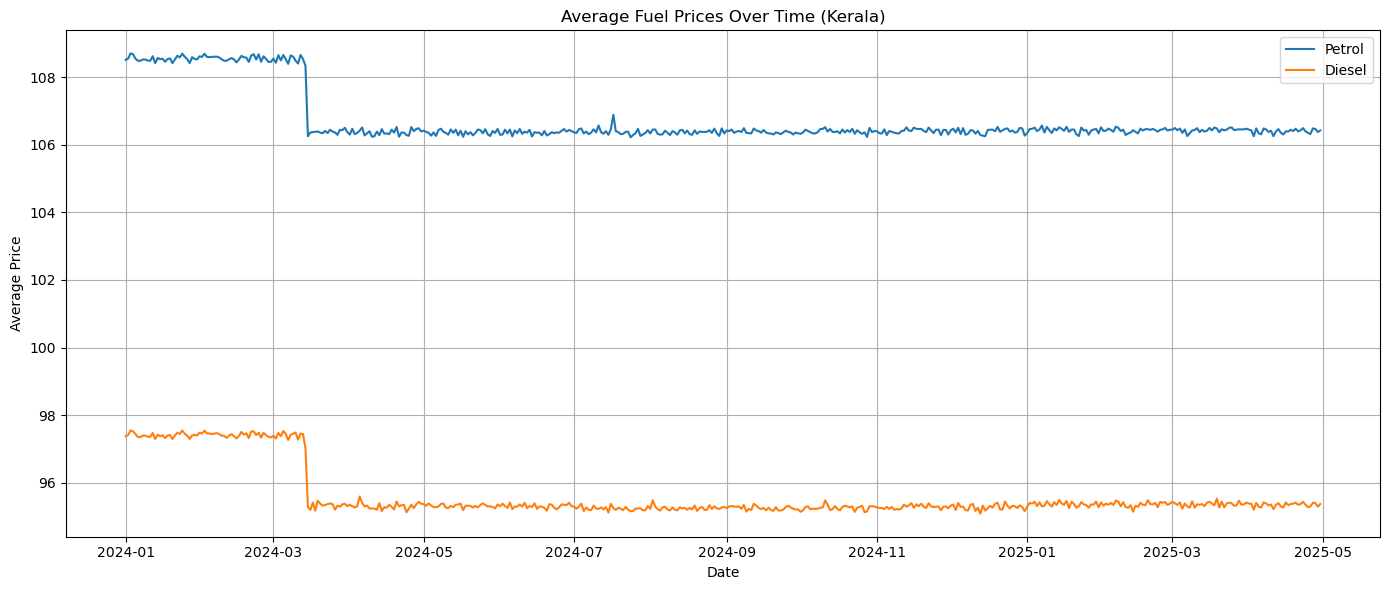

In [91]:
# Price trend over time
plt.figure(figsize=(14,6))
for fuel in ['Petrol', 'Diesel']:
    subset = df[df['Fuel_Type'] == fuel].groupby('Date')['Price'].mean()
    plt.plot(subset, label=fuel)
plt.title('Average Fuel Prices Over Time (Kerala)')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Their is a petrol and diesel price dip in around 2024/03/10 for both fuel

# Daily change distribution

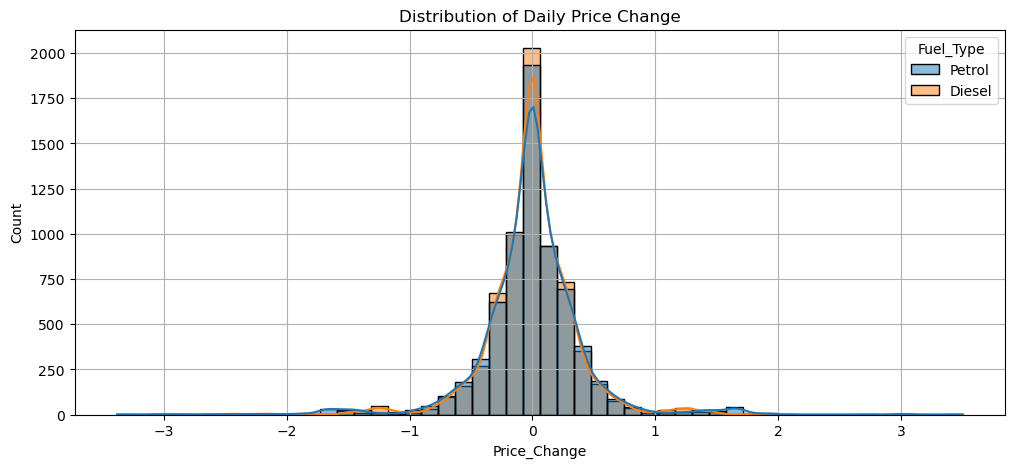

In [96]:
# Daily change distribution
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Price_Change', hue='Fuel_Type', kde=True, bins=50)
plt.title('Distribution of Daily Price Change')
plt.grid()
plt.show()

# Top 5 stable fuel district

In [101]:
# Stability analysis: Standard Deviation of Changes
std_dev_changes = df.groupby(['District', 'Fuel_Type'])['Price_Change'].std().reset_index()
pivot_std = std_dev_changes.pivot(index='District', columns='Fuel_Type', values='Price_Change')
pivot_std['Average_Std_Dev'] = pivot_std.mean(axis=1)

# Display most stable district
most_stable = pivot_std.sort_values('Average_Std_Dev')
print("\nTop 5 Most Stable Districts (Lowest Std Dev of Change):")
print(most_stable.head())


Top 5 Most Stable Districts (Lowest Std Dev of Change):
Fuel_Type            Diesel    Petrol  Average_Std_Dev
District                                              
Ernakulam          0.214608  0.261509         0.238058
Thiruvanthampuram  0.254576  0.222183         0.238379
Kollam             0.245144  0.237217         0.241180
Kasargod           0.249430  0.254408         0.251919
Kannur             0.214302  0.299853         0.257078


# Average daily price change by district 

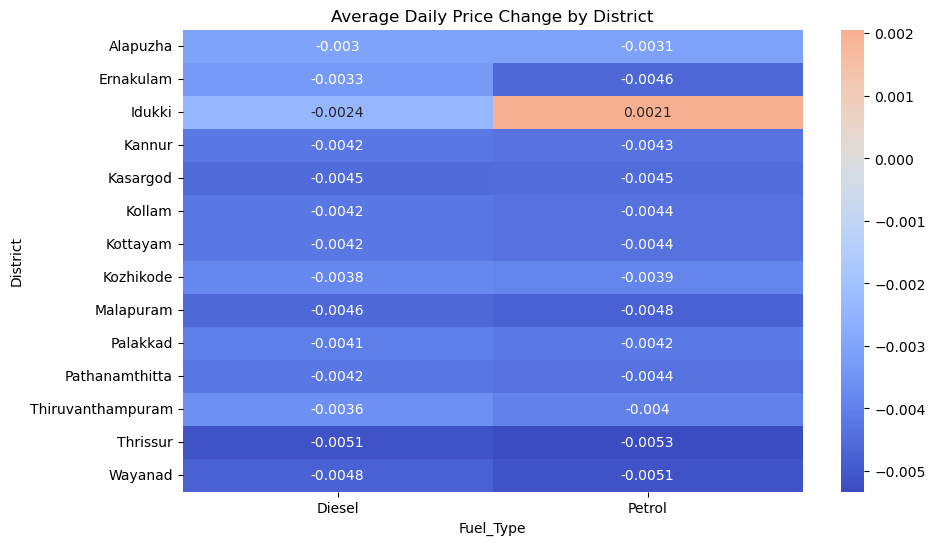

In [104]:
# Heatmap of price changes across districts
avg_change = df.groupby(['District', 'Fuel_Type'])['Price_Change'].mean().reset_index()
heatmap_data = avg_change.pivot(index='District', columns='Fuel_Type', values='Price_Change')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0)
plt.title("Average Daily Price Change by District")
plt.show()

# Price distribution by fuel type

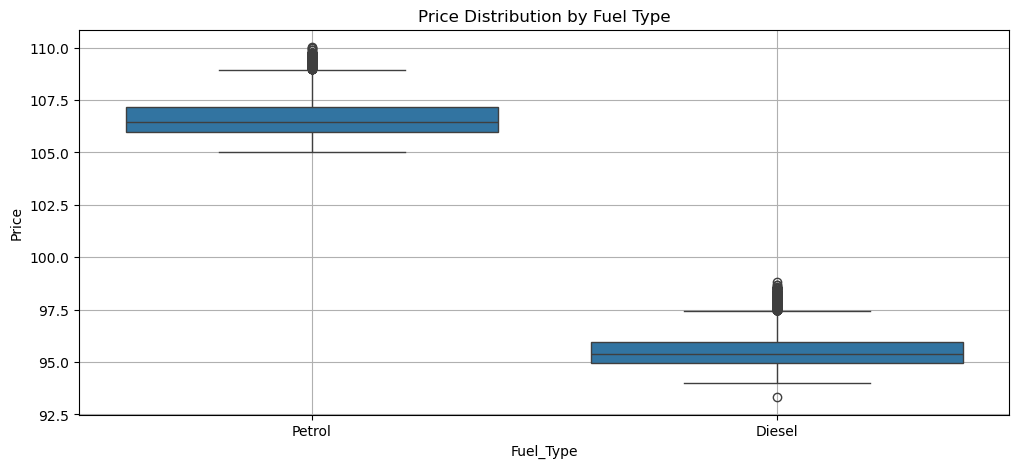

In [108]:
# Price range per fuel type
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Fuel_Type', y='Price')
plt.title('Price Distribution by Fuel Type')
plt.grid()
plt.show()

# Monthly average fuel price

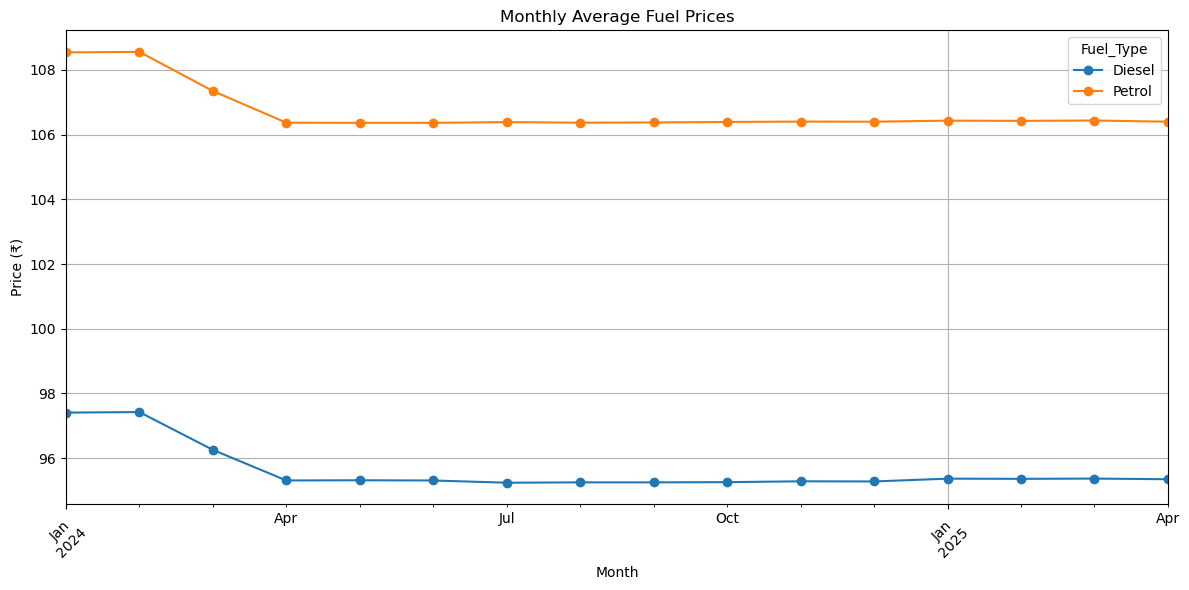

In [112]:
# --- 1. Monthly Trend Analysis ---
monthly_trend = df.groupby(['Month', 'Fuel_Type'])['Price'].mean().unstack()
monthly_trend.plot(figsize=(12,6), marker='o')
plt.title("Monthly Average Fuel Prices")
plt.ylabel("Price (₹)")
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Fuel variablity district-wise

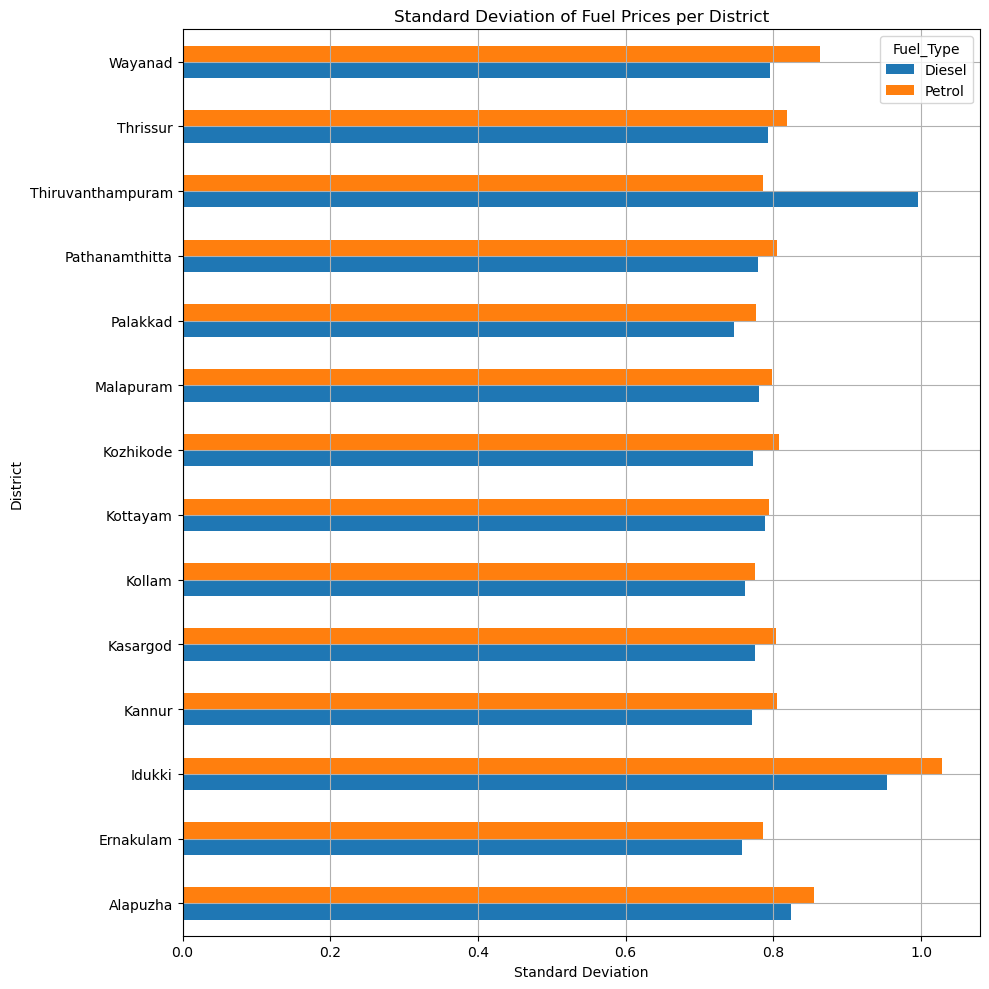

In [116]:
# --- 3. District-Wise Price Variability ---
price_variance = df.groupby(['District', 'Fuel_Type'])['Price'].std().unstack()
price_variance.plot(kind='barh', figsize=(10,10))
plt.title("Standard Deviation of Fuel Prices per District")
plt.xlabel("Standard Deviation")
plt.grid()
plt.tight_layout()
plt.show()

In [118]:
# --- 5. IQR-Based Anomaly Detection ---
def detect_anomalies(df_sub):
    Q1 = df_sub['Price'].quantile(0.25)
    Q3 = df_sub['Price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df_sub[(df_sub['Price'] < lower_bound) | (df_sub['Price'] > upper_bound)]

anomalies = df.groupby(['District', 'Fuel_Type']).apply(detect_anomalies).reset_index(drop=True)
print(f"\nTotal Anomalies Detected in Price (IQR Method): {len(anomalies)}")


Total Anomalies Detected in Price (IQR Method): 1990


# Average fuel price by district

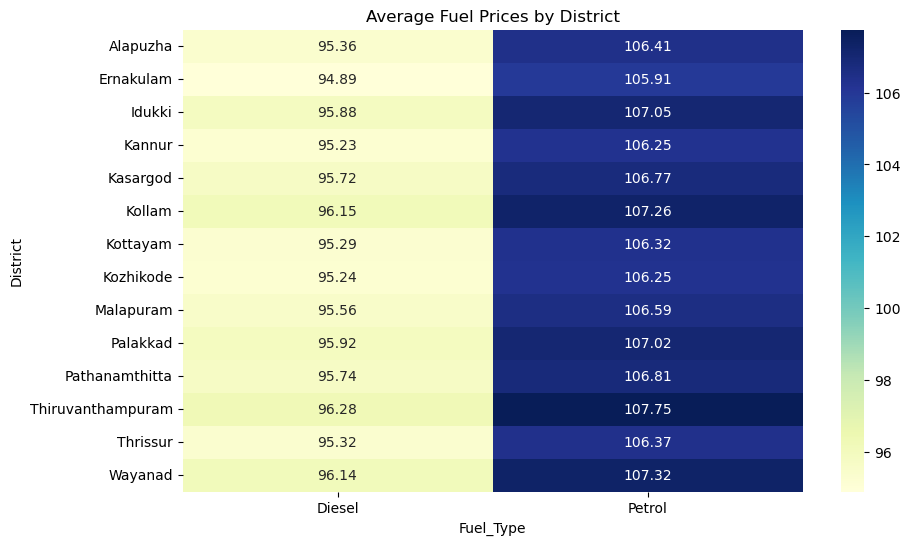

In [122]:
# --- 6. Heatmap of Average Prices by District ---
avg_prices = df.groupby(['District', 'Fuel_Type'])['Price'].mean().reset_index()
price_map = avg_prices.pivot(index='District', columns='Fuel_Type', values='Price')
plt.figure(figsize=(10, 6))
sns.heatmap(price_map, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Average Fuel Prices by District")
plt.show()


# Fuel price change trend of 3 district

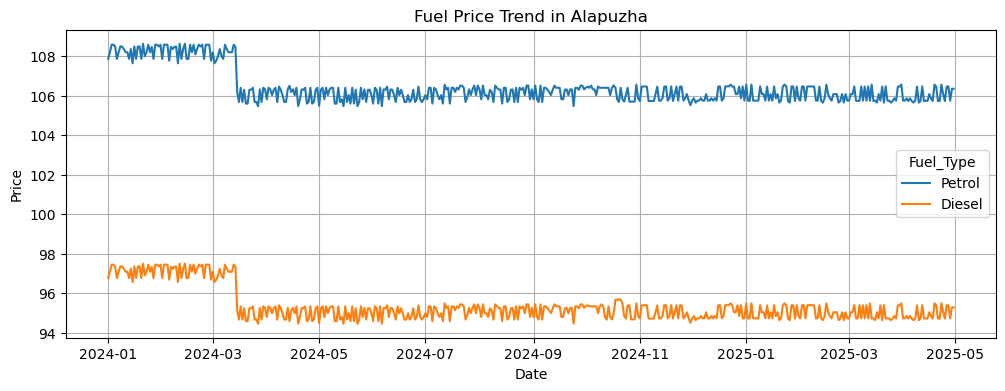

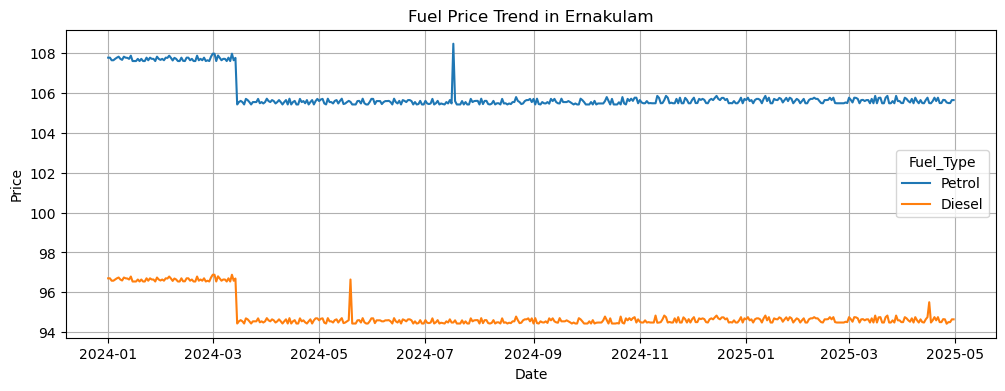

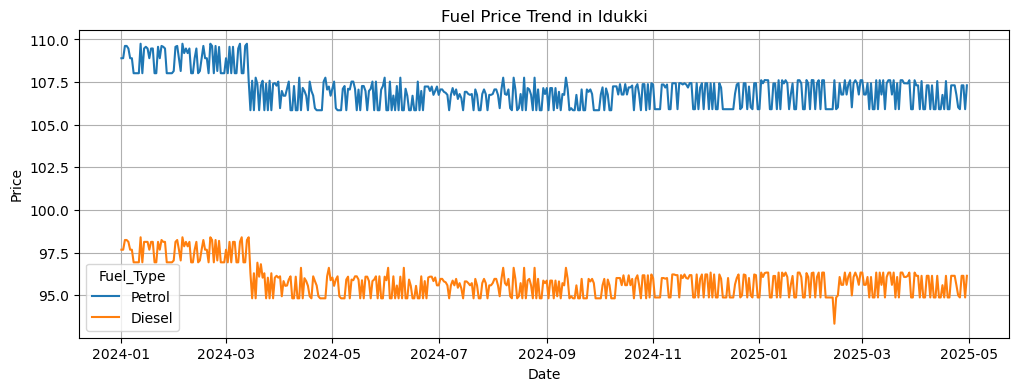

In [126]:
# --- 7. Fuel Price Change Trends by District Example (Top 3) ---
top_districts = df['District'].value_counts().head(3).index.tolist()
for district in top_districts:
    subset = df[df['District'] == district]
    plt.figure(figsize=(12,4))
    sns.lineplot(data=subset, x='Date', y='Price', hue='Fuel_Type')
    plt.title(f'Fuel Price Trend in {district}')
    plt.grid()
    plt.show()

# Time Series

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [220]:
# Load and preprocess data
df = pd.read_csv('Kerala_Fuel_Prices.csv')
df.head()

,Date,District,Fuel_Type,Price,Price_Change
0,01-01-2024,Alapuzha,Petrol,107.86,0.00
1,01-01-2024,Alapuzha,Diesel,96.77,0.00
2,01-01-2024,Ernakulam,Petrol,107.78,-0.11
3,01-01-2024,Ernakulam,Diesel,96.70,-0.10
4,01-01-2024,Idukki,Petrol,108.90,-0.59


In [222]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date')

In [224]:
# Encode Fuel_Type to numerical: Petrol = 1, Diesel = 0
df['Fuel_Type_Code'] = df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 0})

In [226]:
# Separate Petrol and Diesel data, set index to Date
petrol_data = df[df['Fuel_Type_Code'] == 1].copy()
diesel_data = df[df['Fuel_Type_Code'] == 0].copy()
petrol_data.set_index('Date', inplace=True)
diesel_data.set_index('Date', inplace=True)

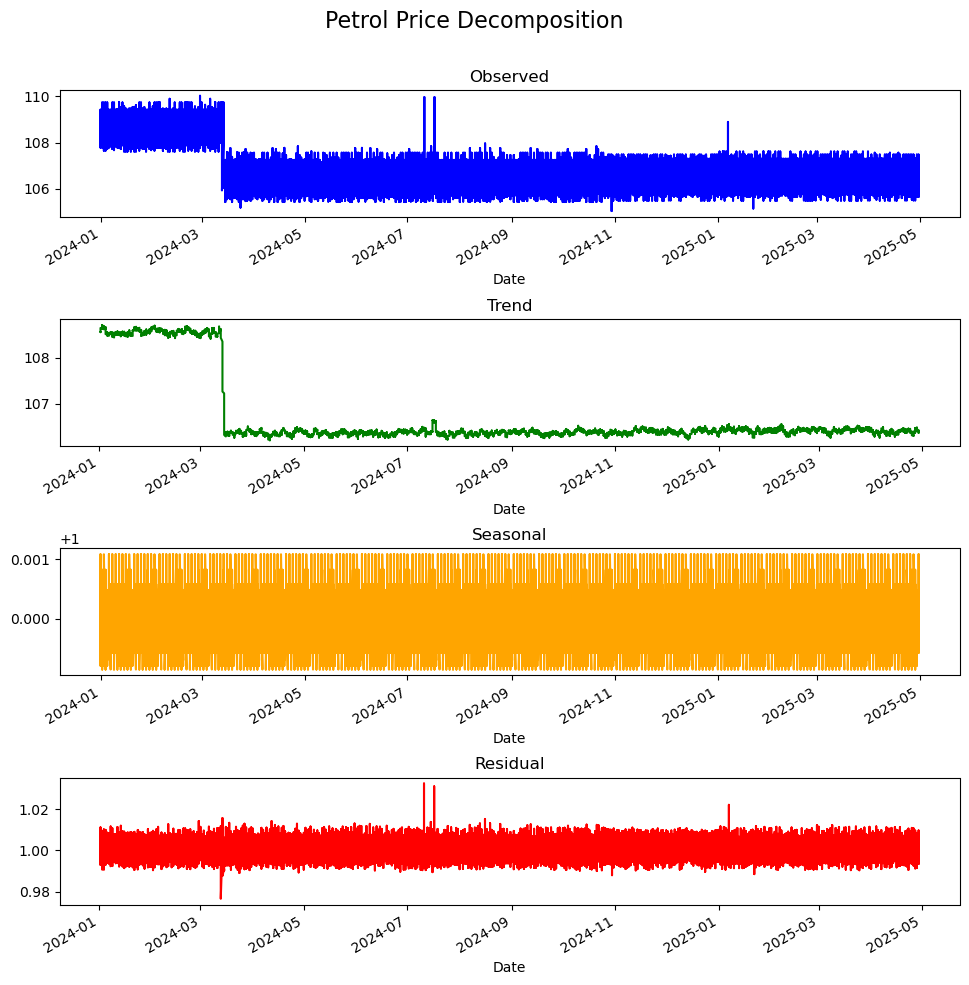

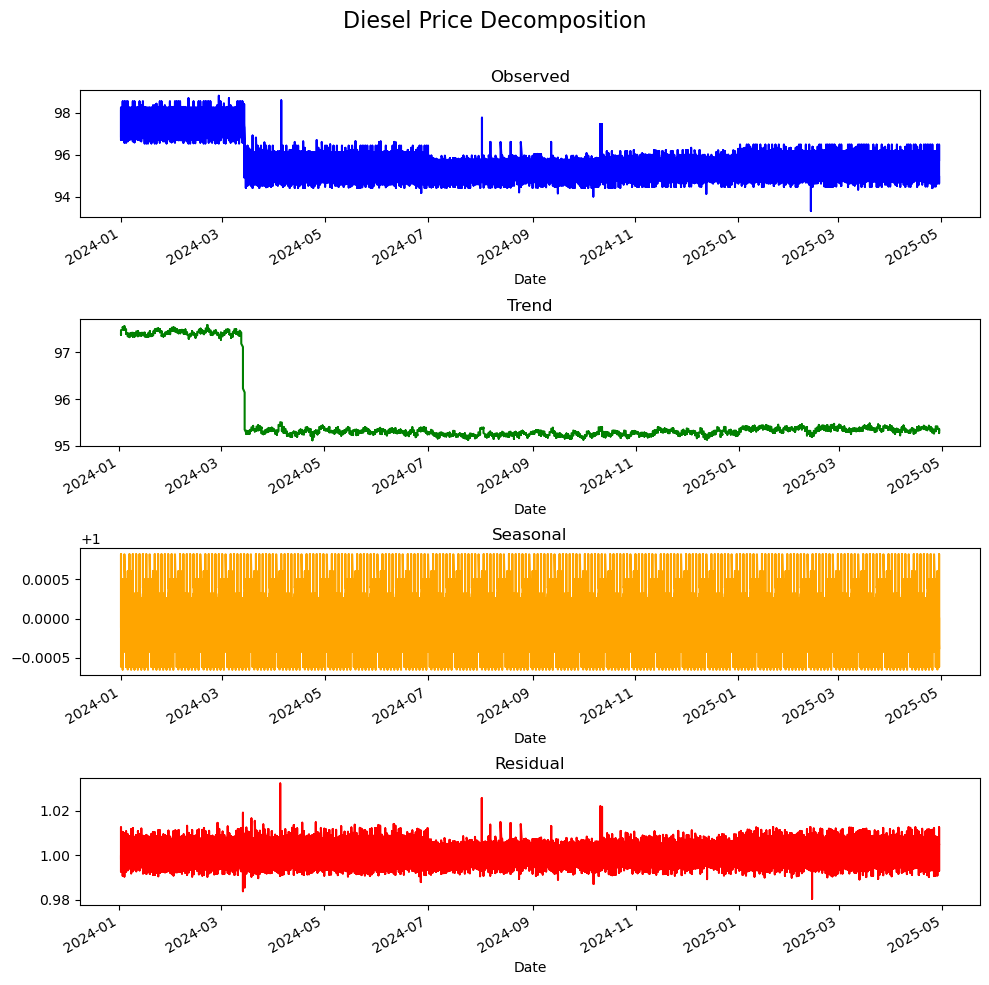

In [228]:
# Time series decomposition function
def decompose_ts(data, fuel_type):
    result = seasonal_decompose(data, model='multiplicative', period=30)
    fig, axes = plt.subplots(4, 1, figsize=(10, 10))
    fig.suptitle(f'{fuel_type} Price Decomposition', fontsize=16)
    result.observed.plot(ax=axes[0], title="Observed", color='blue')
    result.trend.plot(ax=axes[1], title="Trend", color='green')
    result.seasonal.plot(ax=axes[2], title="Seasonal", color='orange')
    result.resid.plot(ax=axes[3], title="Residual", color='red')
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Decompose Petrol and Diesel prices
decompose_ts(petrol_data['Price'], 'Petrol')
decompose_ts(diesel_data['Price'], 'Diesel')

In [230]:
# ADF test for stationarity
def adf_test(data):
    result = adfuller(data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("Reject null hypothesis - Data is stationary")
    else:
        print("Fail to reject null hypothesis - Data is non-stationary")

print("ADF Test for Petrol Price:")
adf_test(petrol_data['Price'])
print("\nADF Test for Diesel Price:")
adf_test(diesel_data['Price'])

ADF Test for Petrol Price:
ADF Statistic: -2.512625
p-value: 0.112433
Critical Values:
	1%: -3.431316289690006
	5%: -2.8619670201299576
	10%: -2.566997299101737
Fail to reject null hypothesis - Data is non-stationary

ADF Test for Diesel Price:
ADF Statistic: -2.461672
p-value: 0.125081
Critical Values:
	1%: -3.431316432496403
	5%: -2.861967083228315
	10%: -2.566997332690214
Fail to reject null hypothesis - Data is non-stationary


In [232]:
# Correct way to add differenced column
petrol_data['Price_diff'] = petrol_data['Price'].diff()
diesel_data['Price_diff'] = diesel_data['Price'].diff()

In [234]:
# Correlation analysis (price changes across districts)
pivoted_petrol = petrol_data.pivot_table(index='Date', columns='District', values='Price_Change')
pivoted_diesel = diesel_data.pivot_table(index='Date', columns='District', values='Price_Change')

correlation_petrol = pivoted_petrol.corr()
correlation_diesel = pivoted_diesel.corr()

([<matplotlib.axis.YTick at 0x1f164fed160>,
 [Text(0, 0, 'Alapuzha'),
  Text(0, 1, 'Ernakulam'),
  Text(0, 2, 'Idukki'),
  Text(0, 3, 'Kannur'),
  Text(0, 4, 'Kasargod'),
  Text(0, 5, 'Kollam'),
  Text(0, 6, 'Kottayam'),
  Text(0, 7, 'Kozhikode'),
  Text(0, 8, 'Malapuram'),
  Text(0, 9, 'Palakkad'),
  Text(0, 10, 'Pathanamthitta'),
  Text(0, 11, 'Thiruvanthampuram'),
  Text(0, 12, 'Thrissur'),
  Text(0, 13, 'Wayanad')])

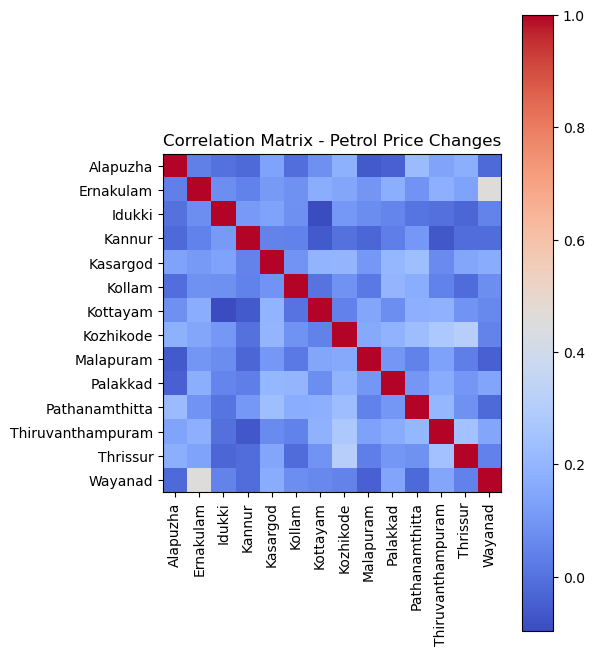

In [236]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title('Correlation Matrix - Petrol Price Changes')
plt.imshow(correlation_petrol, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_petrol.columns)), correlation_petrol.columns, rotation=90)
plt.yticks(range(len(correlation_petrol.columns)), correlation_petrol.columns)

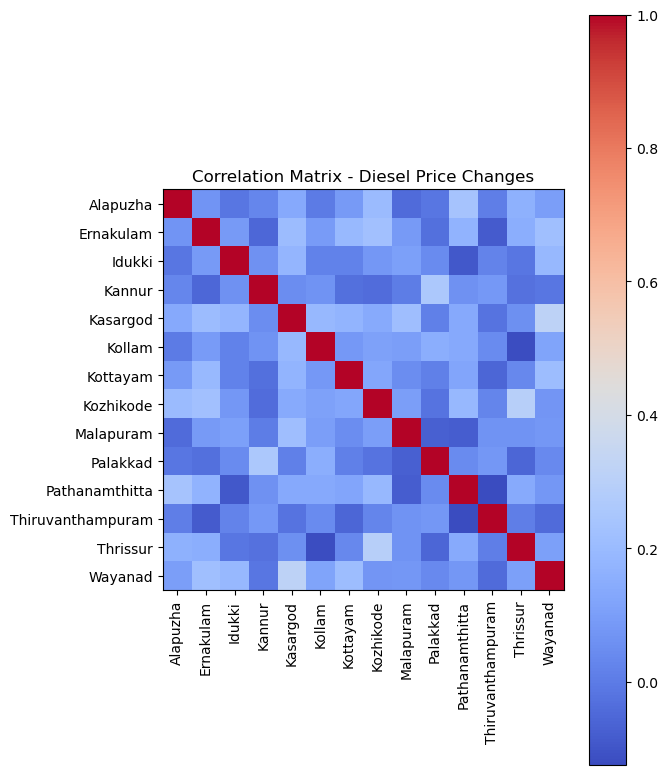

In [238]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 2)
plt.title('Correlation Matrix - Diesel Price Changes')
plt.imshow(correlation_diesel, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation_diesel.columns)), correlation_diesel.columns, rotation=90)
plt.yticks(range(len(correlation_diesel.columns)), correlation_diesel.columns)

plt.tight_layout()
plt.show()

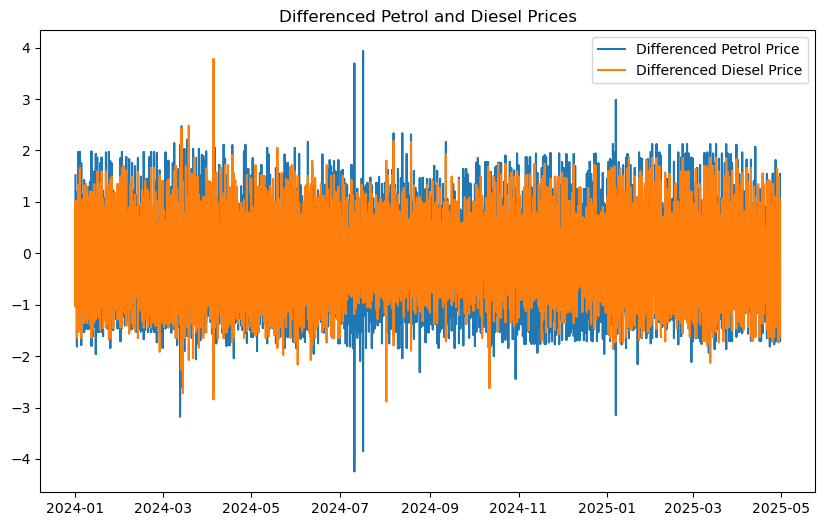

In [240]:
# Plot differenced prices
plt.figure(figsize=(10, 6))
plt.plot(petrol_data['Price_diff'], label="Differenced Petrol Price")
plt.plot(diesel_data['Price_diff'], label="Differenced Diesel Price")
plt.title("Differenced Petrol and Diesel Prices")
plt.legend()
plt.show()

In [242]:
# ADF test for differenced prices
print("ADF Test for Differenced Petrol Price:")
adf_test(petrol_data['Price_diff'].dropna())
print("\nADF Test for Differenced Diesel Price:")
adf_test(diesel_data['Price_diff'].dropna())

ADF Test for Differenced Petrol Price:
ADF Statistic: -20.010062
p-value: 0.000000
Critical Values:
	1%: -3.431316289690006
	5%: -2.8619670201299576
	10%: -2.566997299101737
Reject null hypothesis - Data is stationary

ADF Test for Differenced Diesel Price:
ADF Statistic: -18.751816
p-value: 0.000000
Critical Values:
	1%: -3.4313167182358644
	5%: -2.8619672094809885
	10%: -2.5669973998969566
Reject null hypothesis - Data is stationary


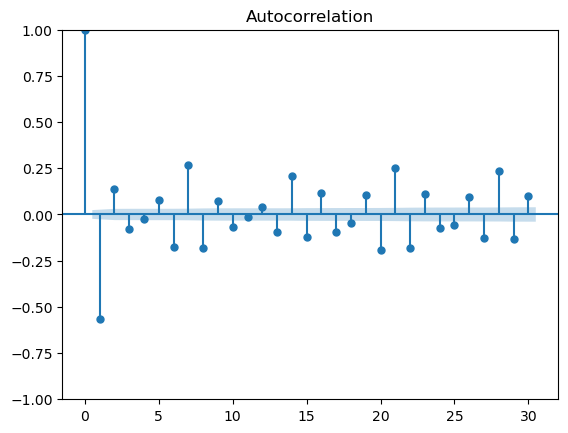

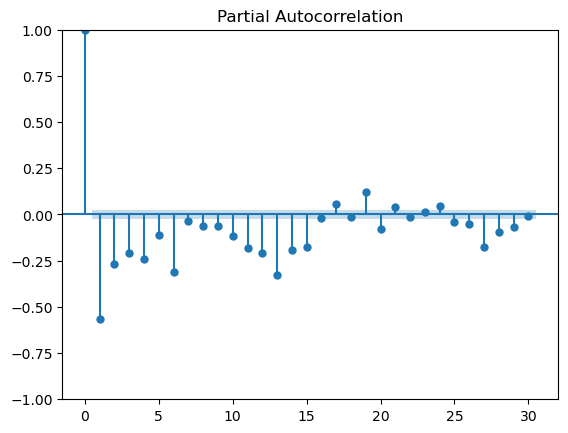

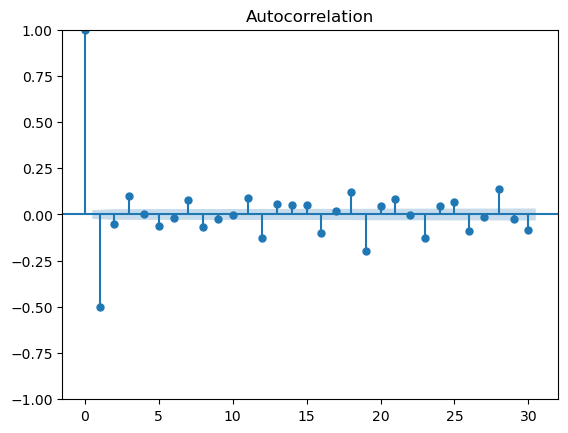

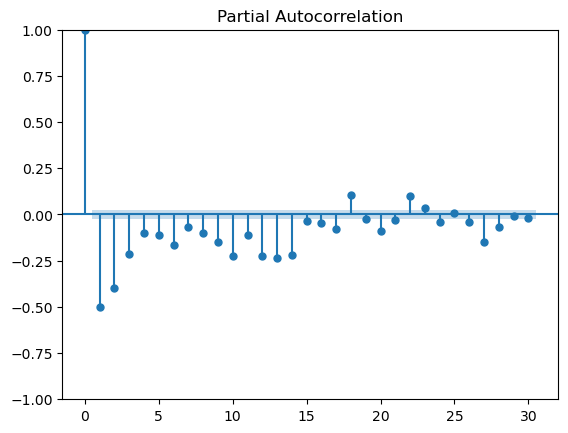

In [244]:
# Plot ACF and PACF for differenced prices
plot_acf(petrol_data['Price_diff'].dropna(), lags=30)
plot_pacf(petrol_data['Price_diff'].dropna(), lags=30)
plt.show()

plot_acf(diesel_data['Price_diff'].dropna(), lags=30)
plot_pacf(diesel_data['Price_diff'].dropna(), lags=30)
plt.show()

In [246]:
# Train-test split for modeling (last 12 days/months as test)
train_petrol = petrol_data['Price_diff'].dropna()[:-12]
test_petrol = petrol_data['Price_diff'].dropna()[-12:]

train_diesel = diesel_data['Price_diff'].dropna()[:-12]
test_diesel = diesel_data['Price_diff'].dropna()[-12:]

In [248]:
#Resample daily data to weekly average to reduce noise and improve speed
train_petrol_weekly = train_petrol.resample('W').mean()
train_diesel_weekly = train_diesel.resample('W').mean()

In [250]:
# --- ARIMA Modeling ---
# ARIMA (non-seasonal)
arima_order = (1, 0, 1)

model_petrol = ARIMA(train_petrol_weekly, order=arima_order)
model_petrol_fit = model_petrol.fit()

model_diesel = ARIMA(train_diesel_weekly, order=arima_order)
model_diesel_fit = model_diesel.fit()

# Forecast next 12 weeks
forecast_petrol = model_petrol_fit.forecast(steps=12)
forecast_diesel = model_diesel_fit.forecast(steps=12)

In [252]:
# --- SARIMA Modeling ---
# SARIMA (seasonal ARIMA) with weekly seasonality
sarima_order = (1, 0, 1)
seasonal_order = (0, 1, 1, 52)  # 52 weeks for annual seasonality

model_sarima_petrol = SARIMAX(train_petrol_weekly,
                              order=sarima_order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
model_sarima_petrol_fit = model_sarima_petrol.fit(disp=False, maxiter=50)

model_sarima_diesel = SARIMAX(train_diesel_weekly,
                              order=sarima_order,
                              seasonal_order=seasonal_order,
                              enforce_stationarity=False,
                              enforce_invertibility=False)
model_sarima_diesel_fit = model_sarima_diesel.fit(disp=False, maxiter=50)

In [254]:
# Forecast next 12 weeks
forecast_sarima_petrol = model_sarima_petrol_fit.forecast(steps=12)
forecast_sarima_diesel = model_sarima_diesel_fit.forecast(steps=12)

In [256]:
# Accuracy metrics
rmse_petrol = np.sqrt(mean_squared_error(test_petrol, forecast_petrol))
rmse_diesel = np.sqrt(mean_squared_error(test_diesel, forecast_diesel))
mae_petrol = mean_absolute_error(test_petrol, forecast_petrol)
mae_diesel = mean_absolute_error(test_diesel, forecast_diesel)

rmse_sarima_petrol = np.sqrt(mean_squared_error(test_petrol, forecast_sarima_petrol))
rmse_sarima_diesel = np.sqrt(mean_squared_error(test_diesel, forecast_sarima_diesel))
mae_sarima_petrol = mean_absolute_error(test_petrol, forecast_sarima_petrol)
mae_sarima_diesel = mean_absolute_error(test_diesel, forecast_sarima_diesel)

print("\nARIMA Model Performance:")
print(f"Petrol - RMSE: {rmse_petrol:.4f}, MAE: {mae_petrol:.4f}")
print(f"Diesel - RMSE: {rmse_diesel:.4f}, MAE: {mae_diesel:.4f}")

print("\nSARIMA Model Performance:")
print(f"Petrol - RMSE: {rmse_sarima_petrol:.4f}, MAE: {mae_sarima_petrol:.4f}")
print(f"Diesel - RMSE: {rmse_sarima_diesel:.4f}, MAE: {mae_sarima_diesel:.4f}")


ARIMA Model Performance:
Petrol - RMSE: 1.0558, MAE: 0.9089
Diesel - RMSE: 0.9038, MAE: 0.7922

SARIMA Model Performance:
Petrol - RMSE: 1.0518, MAE: 0.9054
Diesel - RMSE: 32.5772, MAE: 16.7894


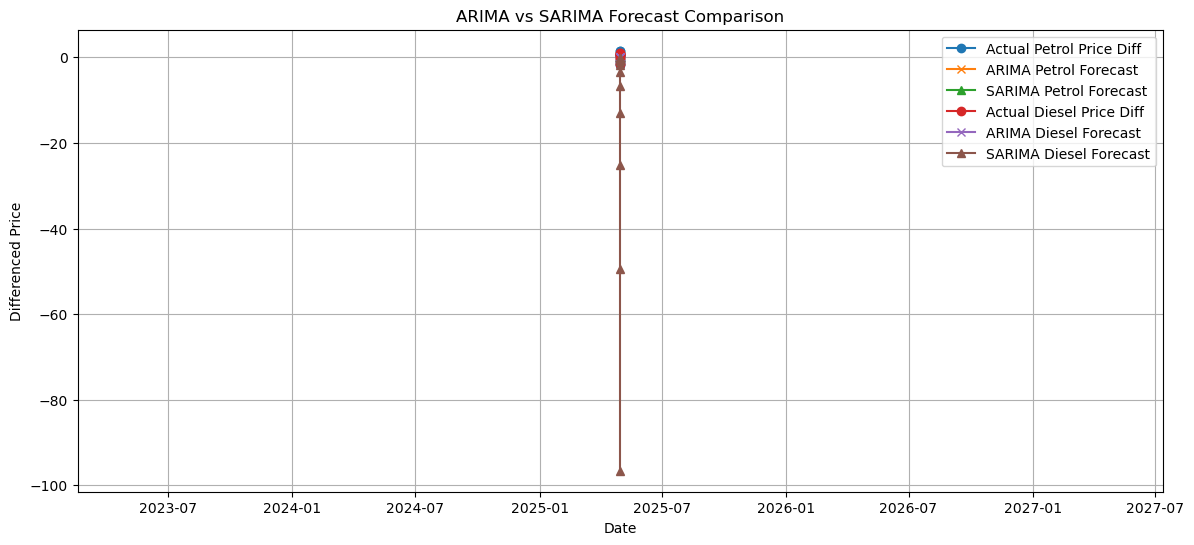

In [258]:
# Plot actual vs ARIMA vs SARIMA forecasts
plt.figure(figsize=(14, 6))
plt.plot(test_petrol.index, test_petrol, label='Actual Petrol Price Diff', marker='o')
plt.plot(test_petrol.index, forecast_petrol, label='ARIMA Petrol Forecast', marker='x')
plt.plot(test_petrol.index, forecast_sarima_petrol, label='SARIMA Petrol Forecast', marker='^')

plt.plot(test_diesel.index, test_diesel, label='Actual Diesel Price Diff', marker='o')
plt.plot(test_diesel.index, forecast_diesel, label='ARIMA Diesel Forecast', marker='x')
plt.plot(test_diesel.index, forecast_sarima_diesel, label='SARIMA Diesel Forecast', marker='^')

plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.grid(True)
plt.show()

# Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, StackingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
df = pd.read_csv("Kerala_Fuel_Prices.csv")
df.head()

,Date,District,Fuel_Type,Price,Price_Change
0,01-01-2024,Alapuzha,Petrol,107.86,0.00
1,01-01-2024,Alapuzha,Diesel,96.77,0.00
2,01-01-2024,Ernakulam,Petrol,107.78,-0.11
3,01-01-2024,Ernakulam,Diesel,96.70,-0.10
4,01-01-2024,Idukki,Petrol,108.90,-0.59


In [5]:
# Convert date
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [7]:
# Feature Engineering
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [9]:
# Label encode district
le = LabelEncoder()
df['District'] = le.fit_transform(df['District'])

In [11]:
# Encode Fuel_Type to numerical: Petrol = 1, Diesel = 0
df['Fuel_Type_Code'] = df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 0})

In [13]:
# Separate Petrol and Diesel data using encoded column
df_petrol = df[df['Fuel_Type_Code'] == 1].copy()
df_diesel = df[df['Fuel_Type_Code'] == 0].copy()

In [15]:
# Drop columns not used in model input
drop_cols = ['Fuel_Type', 'Fuel_Type_Code', 'Date']

In [17]:
# Define models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Bagging": BaggingRegressor()
}


In [19]:
def evaluate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mape, mse, rmse, r2

def preprocess_and_train(df_subset, fuel_type):
    print(f"\n====== {fuel_type.upper()} MODEL ======")
    
    X = df_subset.drop(columns=['Price'] + drop_cols)
    y = df_subset['Price']

    # Scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # PCA
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    # Model results
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae, mape, mse, rmse, r2 = evaluate_metrics(y_test, y_pred)
        results.append({
            'Model': name,
            'MAE': mae,
            'MAPE (%)': mape,
            'MSE': mse,
            'RMSE': rmse,
            'R²': r2
        })
        print(f"{name}: MAE={mae:.2f}, MAPE={mape:.2f}%, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

    # Hyperparameter tuning for RandomForest
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, None],
        'min_samples_split': [2, 5]
    }
    grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring='r2', verbose=0)
    grid_search.fit(X_train, y_train)
    print(f"\nBest RandomForest params for {fuel_type}: {grid_search.best_params_}")

    # Stacking Regressor
    estimators = [
        ('rf', RandomForestRegressor(n_estimators=100)),
        ('xgb', XGBRegressor())
    ]
    stack_model = StackingRegressor(estimators=estimators, final_estimator=GradientBoostingRegressor())
    stack_model.fit(X_train, y_train)
    y_pred_stack = stack_model.predict(X_test)
    mae, mape, mse, rmse, r2 = evaluate_metrics(y_test, y_pred_stack)
    results.append({
        'Model': 'StackingRegressor',
        'MAE': mae,
        'MAPE (%)': mape,
        'MSE': mse,
        'RMSE': rmse,
        'R²': r2
    })
    print(f"Stacked Model: MAE={mae:.2f}, MAPE={mape:.2f}%, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

    return pd.DataFrame(results), y_test, y_pred_stack


# Train for Petrol
results_petrol, y_test_petrol, y_pred_stack_petrol = preprocess_and_train(df_petrol, "Petrol")

# Train for Diesel
results_diesel, y_test_diesel, y_pred_stack_diesel = preprocess_and_train(df_diesel, "Diesel")

# Add Fuel type to each result
results_petrol['Fuel_Type'] = 'Petrol'
results_diesel['Fuel_Type'] = 'Diesel'

# Combine results
summary_df = pd.concat([results_petrol, results_diesel], ignore_index=True)

# Pivot to compare models side-by-side
comparison_df = summary_df.pivot(index='Model', columns='Fuel_Type', values='R²').reset_index()

# Print Summary Table
print("\n=== R² Score Comparison for Models ===")
print(comparison_df)



====== PETROL MODEL ======
LinearRegression: MAE=0.61, MAPE=0.57%, MSE=0.57, RMSE=0.75, R²=0.4151
Ridge: MAE=0.61, MAPE=0.57%, MSE=0.57, RMSE=0.75, R²=0.4151
Lasso: MAE=0.76, MAPE=0.71%, MSE=0.97, RMSE=0.99, R²=-0.0001
ElasticNet: MAE=0.76, MAPE=0.71%, MSE=0.97, RMSE=0.99, R²=-0.0001
DecisionTree: MAE=0.24, MAPE=0.23%, MSE=0.18, RMSE=0.42, R²=0.8154
RandomForest: MAE=0.20, MAPE=0.19%, MSE=0.09, RMSE=0.30, R²=0.9061
GradientBoosting: MAE=0.35, MAPE=0.32%, MSE=0.19, RMSE=0.43, R²=0.8063
XGBoost: MAE=0.22, MAPE=0.21%, MSE=0.10, RMSE=0.32, R²=0.8958
Bagging: MAE=0.22, MAPE=0.20%, MSE=0.10, RMSE=0.32, R²=0.8927

Best RandomForest params for Petrol: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Stacked Model: MAE=0.19, MAPE=0.18%, MSE=0.08, RMSE=0.29, R²=0.9127

====== DIESEL MODEL ======
LinearRegression: MAE=0.56, MAPE=0.58%, MSE=0.48, RMSE=0.70, R²=0.4389
Ridge: MAE=0.56, MAPE=0.58%, MSE=0.48, RMSE=0.70, R²=0.4389
Lasso: MAE=0.70, MAPE=0.72%, MSE=0.86, RMSE=0.93, R²=-0

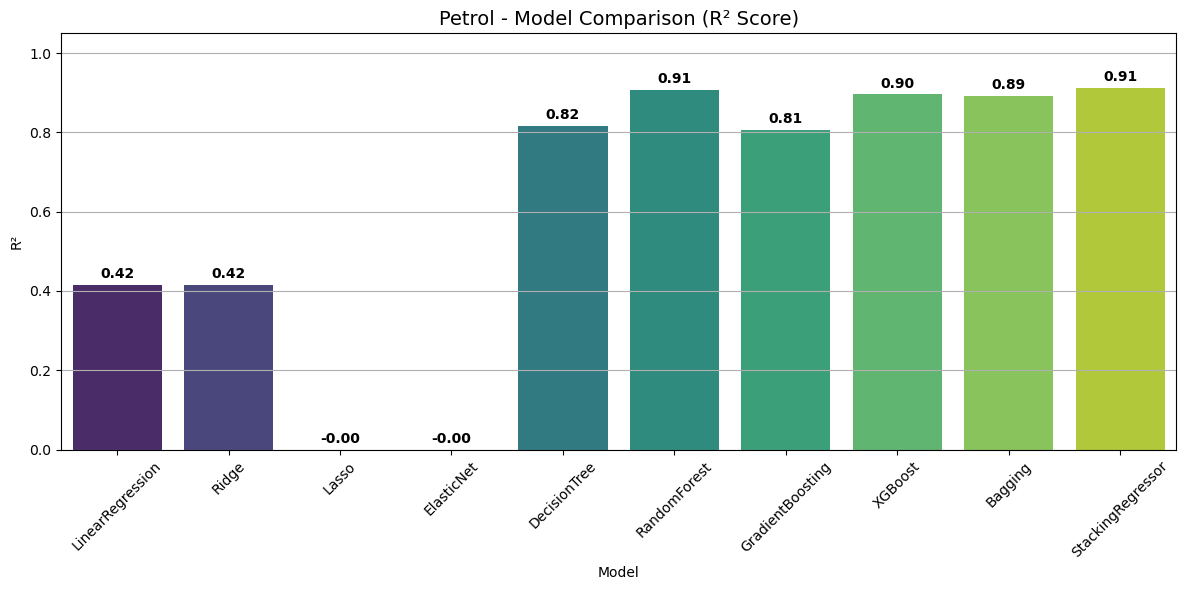

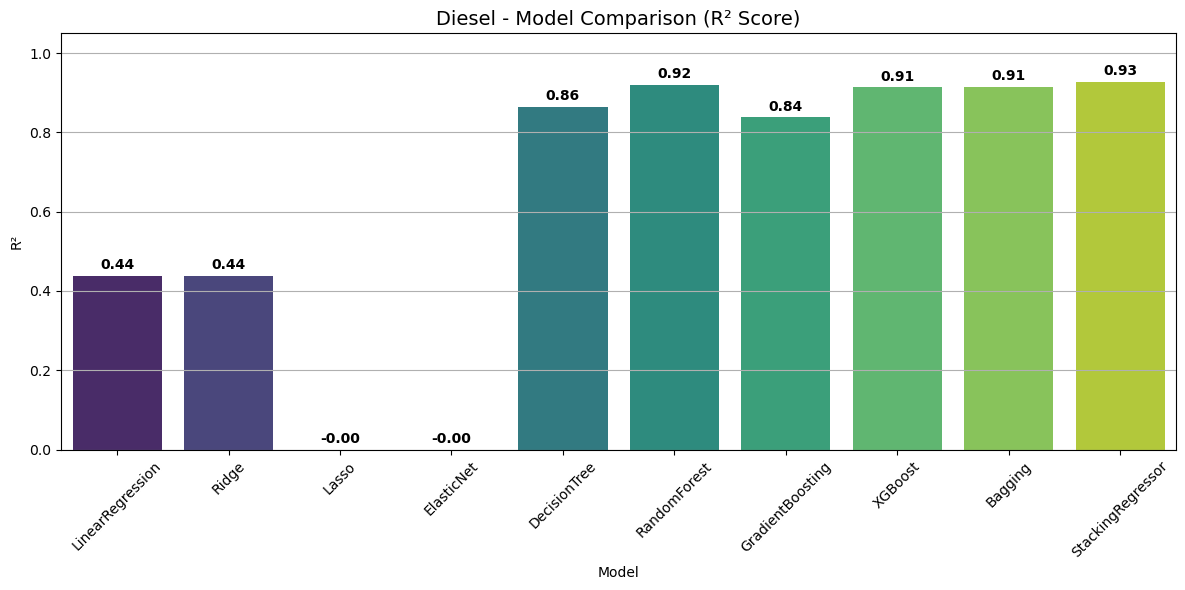

In [20]:
def plot_model_comparison(results_df, fuel_type):
    plt.figure(figsize=(12,6))
    ax = sns.barplot(data=results_df, x='Model', y='R²', palette='viridis')
    for i, row in results_df.iterrows():
        ax.text(i, row['R²'] + 0.01, f"{row['R²']:.2f}", ha='center', va='bottom', fontsize=10, fontweight='bold')
    plt.title(f'{fuel_type} - Model Comparison (R² Score)', fontsize=14)
    plt.xticks(rotation=45)
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

# Plot comparisons
plot_model_comparison(results_petrol, "Petrol")
plot_model_comparison(results_diesel, "Diesel")

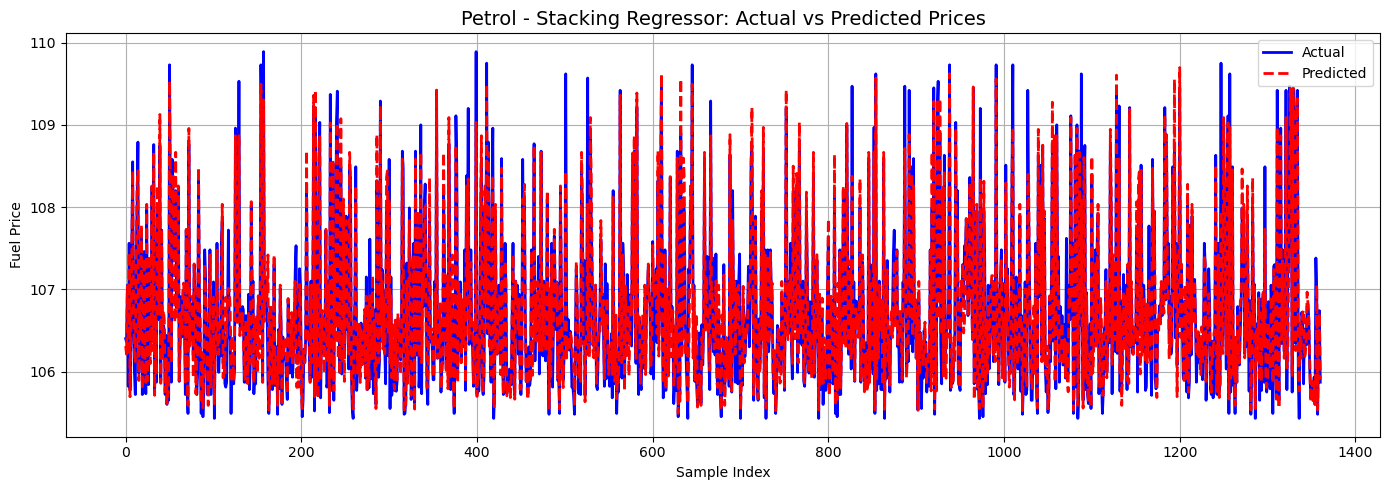

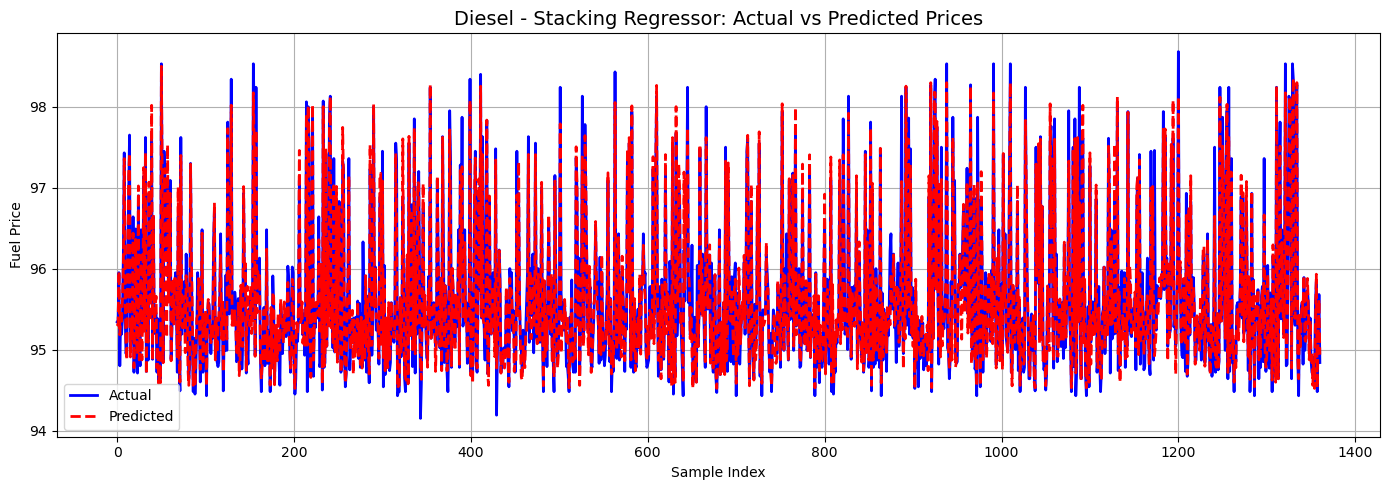

In [21]:
def plot_actual_vs_predicted(y_test, y_pred, fuel_type):
    plt.figure(figsize=(14, 5))
    plt.plot(y_test.values, label='Actual', color='blue', linewidth=2)
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--', linewidth=2)
    plt.title(f'{fuel_type} - Stacking Regressor: Actual vs Predicted Prices', fontsize=14)
    plt.xlabel('Sample Index')
    plt.ylabel('Fuel Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predictions
plot_actual_vs_predicted(y_test_petrol, y_pred_stack_petrol, 'Petrol')
plot_actual_vs_predicted(y_test_diesel, y_pred_stack_diesel, 'Diesel')

# Clustering

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [338]:
# Load the dataset
df = pd.read_csv("Kerala_Fuel_Prices.csv")

# Check the first few rows to ensure the 'Date' column is converted correctly
print(df.head())

         Date   District Fuel_Type   Price  Price_Change
0  01-01-2024   Alapuzha    Petrol  107.86          0.00
1  01-01-2024   Alapuzha    Diesel   96.77          0.00
2  01-01-2024  Ernakulam    Petrol  107.78         -0.11
3  01-01-2024  Ernakulam    Diesel   96.70         -0.10
4  01-01-2024     Idukki    Petrol  108.90         -0.59


In [340]:
# Convert 'Date' to datetime with the correct format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [342]:
# Extract date parts
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Year'] = df['Date'].dt.year

In [344]:
# One-Hot Encoding for Fuel_Type
fuel_dummies = pd.get_dummies(df['Fuel_Type'], prefix='Fuel')
df = pd.concat([df.drop('Fuel_Type', axis=1), fuel_dummies], axis=1)

In [350]:
df_petrol = df[df['Fuel_Petrol'] == 1].copy()
df_diesel = df[df['Fuel_Diesel'] == 1].copy()

In [352]:
# --- Petrol Analysis ---
# Feature selection for clustering (Price, Change)
petrol_features = df_petrol[['Price', 'Price_Change']]

In [354]:
# Standardize for clustering
scaler = StandardScaler()

In [356]:
# ---------------------- PETROL ----------------------

# Cluster districts based on avg price and change - PETROL
petrol_grouped = df_petrol.groupby('District')[['Price', 'Price_Change']].mean().reset_index()
scaled_petrol = scaler.fit_transform(petrol_grouped[['Price', 'Price_Change']])

In [358]:
# K-Means clustering
kmeans_p = KMeans(n_clusters=3, random_state=42)
petrol_grouped['Cluster_KMeans'] = kmeans_p.fit_predict(scaled_petrol)

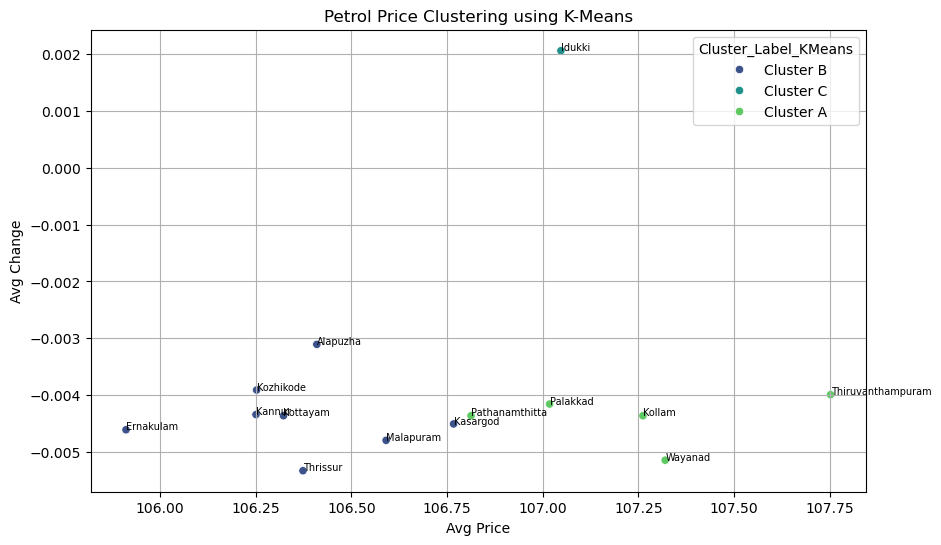

In [360]:
# Map cluster labels to descriptive names
petrol_grouped['Cluster_Label_KMeans'] = petrol_grouped['Cluster_KMeans'].map({
    0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'
})

# Plot K-Means for Petrol
plt.figure(figsize=(10, 6))
sns.scatterplot(data=petrol_grouped, x='Price', y='Price_Change', hue='Cluster_Label_KMeans', palette='viridis')
for i, txt in enumerate(petrol_grouped['District']):
    plt.annotate(txt, (petrol_grouped['Price'][i], petrol_grouped['Price_Change'][i]), fontsize=7)
plt.title('Petrol Price Clustering using K-Means')
plt.xlabel('Avg Price')
plt.ylabel('Avg Change')
plt.grid(True)
plt.show()

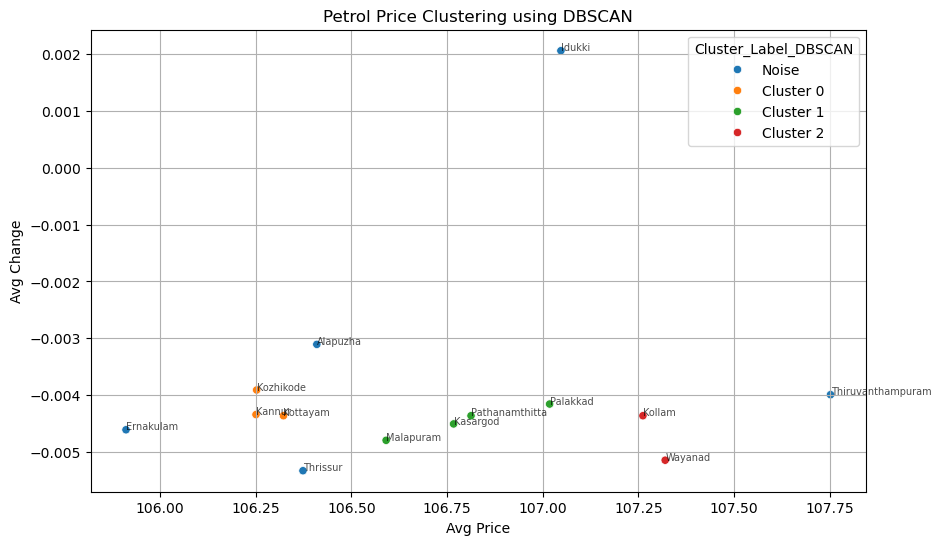

In [362]:
# DBSCAN Clustering for Petrol
dbscan_p = DBSCAN(eps=0.5, min_samples=2)
petrol_grouped['Cluster_DBSCAN'] = dbscan_p.fit_predict(scaled_petrol)
petrol_grouped['Cluster_Label_DBSCAN'] = petrol_grouped['Cluster_DBSCAN'].map(lambda x: f'Cluster {x}' if x != -1 else 'Noise')

# Plot DBSCAN with District Annotations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=petrol_grouped, x='Price', y='Price_Change', hue='Cluster_Label_DBSCAN', palette='tab10')

# Annotate each point with district name
for i, row in petrol_grouped.iterrows():
    plt.annotate(row['District'], (row['Price'], row['Price_Change']), fontsize=7, alpha=0.7)

plt.title('Petrol Price Clustering using DBSCAN')
plt.xlabel('Avg Price')
plt.ylabel('Avg Change')
plt.grid(True)
plt.show()

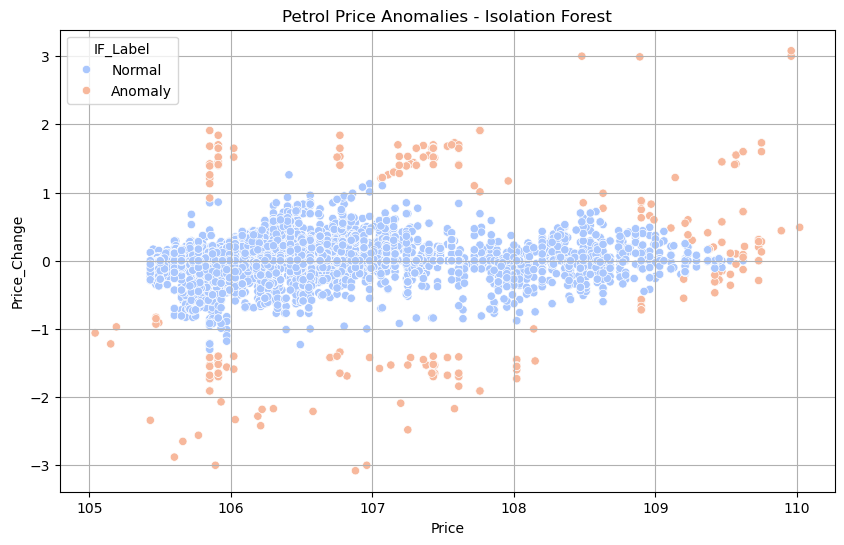

In [364]:
# Anomaly Detection - Isolation Forest (Petrol)
petrol_features = df_petrol[['Price', 'Price_Change']]
scaled_petrol_feats = scaler.fit_transform(petrol_features)

iso_forest_p = IsolationForest(contamination=0.05, random_state=42)
df_petrol['IF_Anomaly'] = iso_forest_p.fit_predict(scaled_petrol_feats)
df_petrol['IF_Label'] = df_petrol['IF_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plot Isolation Forest Results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_petrol, x='Price', y='Price_Change', hue='IF_Label', palette='coolwarm')
plt.title('Petrol Price Anomalies - Isolation Forest')
plt.grid(True)
plt.show()

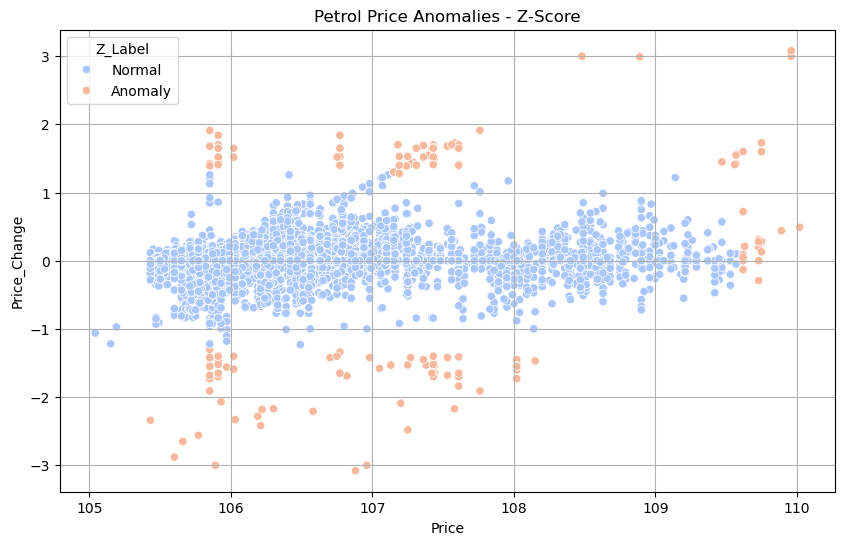

In [366]:
# Anomaly Detection - Z-Score (Petrol)
z_scores_p = np.abs(stats.zscore(df_petrol[['Price', 'Price_Change']]))
df_petrol['Z_Anomaly'] = (z_scores_p.max(axis=1) > 3).astype(int)
df_petrol['Z_Label'] = df_petrol['Z_Anomaly'].map({0: 'Normal', 1: 'Anomaly'})

# Plot Z-Score Anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_petrol, x='Price', y='Price_Change', hue='Z_Label', palette='coolwarm')
plt.title('Petrol Price Anomalies - Z-Score')
plt.grid(True)
plt.show()

In [368]:
# ---------------------- DIESEL ----------------------

# Cluster districts based on avg price and change - DIESEL
diesel_grouped = df_diesel.groupby('District')[['Price', 'Price_Change']].mean().reset_index()
scaled_diesel = scaler.fit_transform(diesel_grouped[['Price', 'Price_Change']])

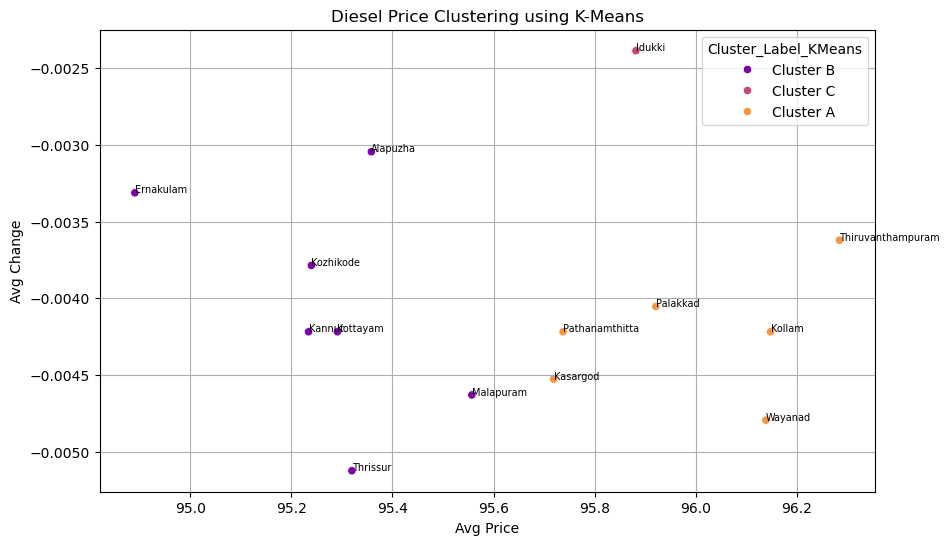

In [370]:
# K-Means clustering
kmeans_d = KMeans(n_clusters=3, random_state=42)
diesel_grouped['Cluster_KMeans'] = kmeans_d.fit_predict(scaled_diesel)
diesel_grouped['Cluster_Label_KMeans'] = diesel_grouped['Cluster_KMeans'].map({
    0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'
})

# Plot K-Means for Diesel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diesel_grouped, x='Price', y='Price_Change', hue='Cluster_Label_KMeans', palette='plasma')
for i, txt in enumerate(diesel_grouped['District']):
    plt.annotate(txt, (diesel_grouped['Price'][i], diesel_grouped['Price_Change'][i]), fontsize=7)
plt.title('Diesel Price Clustering using K-Means')
plt.xlabel('Avg Price')
plt.ylabel('Avg Change')
plt.grid(True)
plt.show()

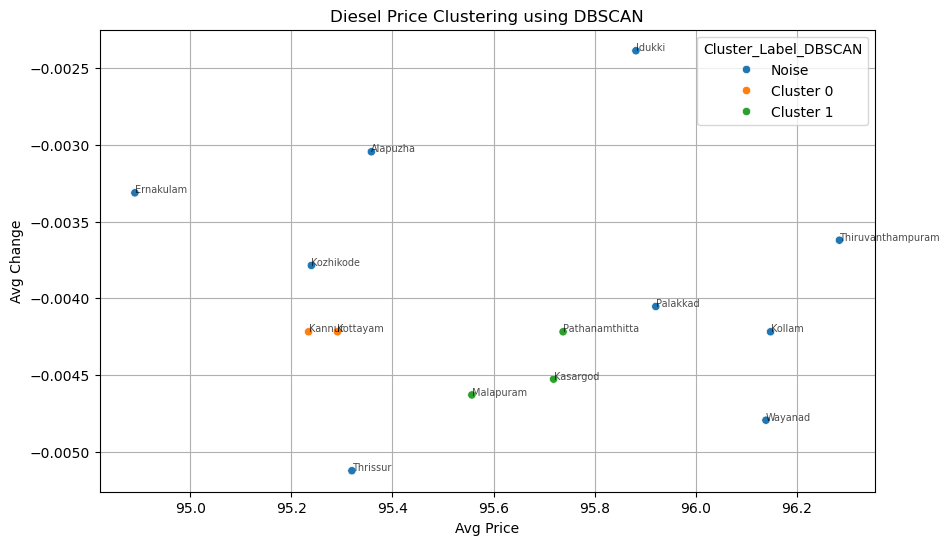

In [372]:
# DBSCAN Clustering for Diesel
dbscan_d = DBSCAN(eps=0.5, min_samples=2)
diesel_grouped['Cluster_DBSCAN'] = dbscan_d.fit_predict(scaled_diesel)
diesel_grouped['Cluster_Label_DBSCAN'] = diesel_grouped['Cluster_DBSCAN'].map(lambda x: f'Cluster {x}' if x != -1 else 'Noise')

# Plot DBSCAN for Diesel with district annotations
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diesel_grouped, x='Price', y='Price_Change', hue='Cluster_Label_DBSCAN', palette='tab10')

# Annotate districts
for i, row in diesel_grouped.iterrows():
    plt.annotate(row['District'], (row['Price'], row['Price_Change']), fontsize=7, alpha=0.7)

plt.title('Diesel Price Clustering using DBSCAN')
plt.xlabel('Avg Price')
plt.ylabel('Avg Change')
plt.grid(True)
plt.show()

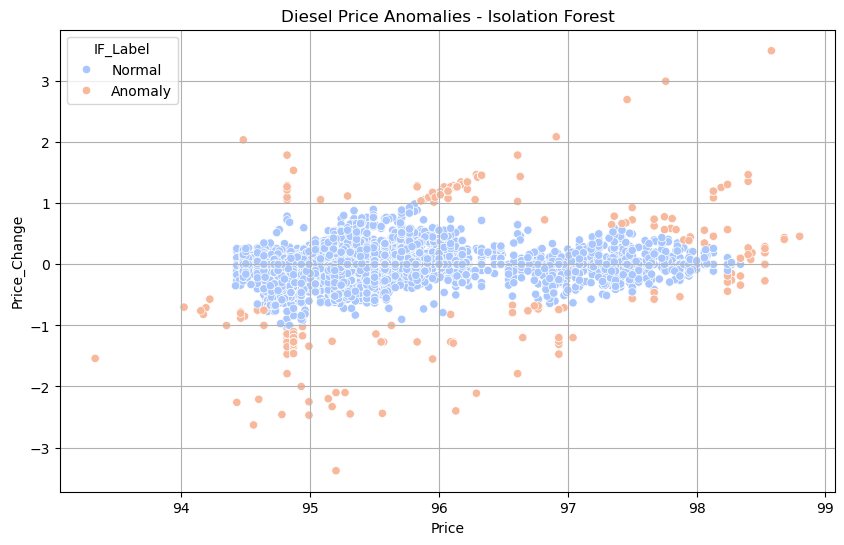

In [374]:
# Anomaly Detection - Isolation Forest (Diesel)
diesel_features = df_diesel[['Price', 'Price_Change']]
scaled_diesel_feats = scaler.fit_transform(diesel_features)

iso_forest_d = IsolationForest(contamination=0.05, random_state=42)
df_diesel['IF_Anomaly'] = iso_forest_d.fit_predict(scaled_diesel_feats)
df_diesel['IF_Label'] = df_diesel['IF_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

# Plot Isolation Forest for Diesel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diesel, x='Price', y='Price_Change', hue='IF_Label', palette='coolwarm')
plt.title('Diesel Price Anomalies - Isolation Forest')
plt.grid(True)
plt.show()

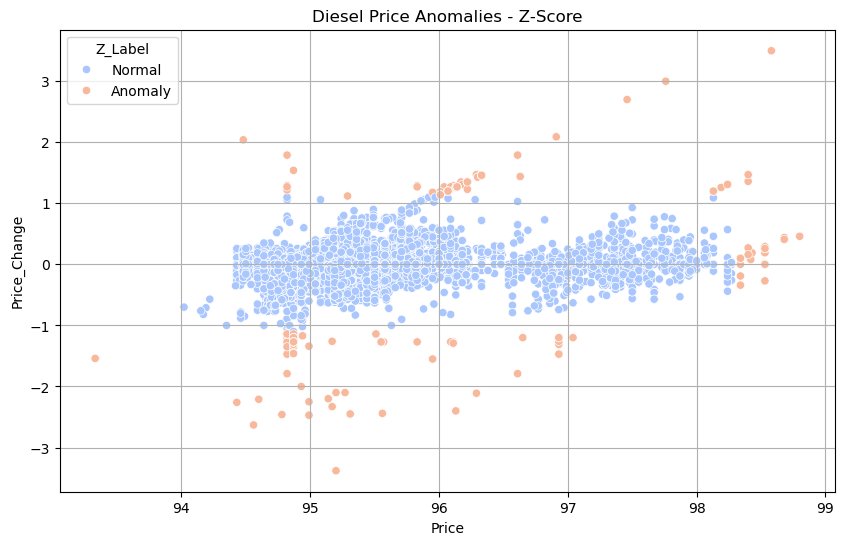

In [376]:
# Anomaly Detection - Z-Score (Diesel)
z_scores_d = np.abs(stats.zscore(df_diesel[['Price', 'Price_Change']]))
df_diesel['Z_Anomaly'] = (z_scores_d.max(axis=1) > 3).astype(int)
df_diesel['Z_Label'] = df_diesel['Z_Anomaly'].map({0: 'Normal', 1: 'Anomaly'})

# Plot Z-Score for Diesel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_diesel, x='Price', y='Price_Change', hue='Z_Label', palette='coolwarm')
plt.title('Diesel Price Anomalies - Z-Score')
plt.grid(True)
plt.show()

# Deep Learning

In [378]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

In [380]:
# Load and preprocess (assumed already done):
df = pd.read_csv('Kerala_Fuel_Prices.csv')
df.head()

,Date,District,Fuel_Type,Price,Price_Change
0,01-01-2024,Alapuzha,Petrol,107.86,0.00
1,01-01-2024,Alapuzha,Diesel,96.77,0.00
2,01-01-2024,Ernakulam,Petrol,107.78,-0.11
3,01-01-2024,Ernakulam,Diesel,96.70,-0.10
4,01-01-2024,Idukki,Petrol,108.90,-0.59


In [382]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [386]:
# Encode Fuel_Type to numerical for possible use
df['Fuel_Petrol'] = df['Fuel_Type'].map({'Petrol': 1, 'Diesel': 0})

In [388]:
# Separate petrol and diesel data
df_petrol = df[df['Fuel_Type'] == 'Petrol']
df_diesel = df[df['Fuel_Type'] == 'Diesel']

In [390]:
petrol_pivot = df_petrol.pivot(index='Date', columns='District', values='Price').sort_index().fillna(method='ffill')
diesel_pivot = df_diesel.pivot(index='Date', columns='District', values='Price').sort_index().fillna(method='ffill')

In [392]:
scaler_petrol = MinMaxScaler()
scaler_diesel = MinMaxScaler()
petrol_scaled = scaler_petrol.fit_transform(petrol_pivot)
diesel_scaled = scaler_diesel.fit_transform(diesel_pivot)

In [394]:
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 30
X_petrol, y_petrol = create_sequences(petrol_scaled, seq_len)
X_diesel, y_diesel = create_sequences(diesel_scaled, seq_len)

In [396]:
# LSTM model for Petrol
model_lstm = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(seq_len, petrol_scaled.shape[1])),
    Dropout(0.2),
    LSTM(32, activation='tanh'),
    Dropout(0.2),
    Dense(petrol_scaled.shape[1])
])
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_petrol, y_petrol, epochs=50, batch_size=32, validation_split=0.1,
               callbacks=[EarlyStopping(patience=7, restore_best_weights=True)])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 130ms/step - loss: 0.0918 - val_loss: 0.0079
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0339 - val_loss: 0.0070
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0243 - val_loss: 0.0077
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0200 - val_loss: 0.0069
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0211 - val_loss: 0.0071
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0192 - val_loss: 0.0068
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0156 - val_loss: 0.0067
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0195 - val_loss: 0.0068
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0165 - val_loss: 0.0065
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0169 - val_loss: 0.0073
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0159 - val_loss: 0.0065
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.

In [398]:
# GRU model for Diesel
model_gru = Sequential([
    GRU(64, activation='tanh', return_sequences=True, input_shape=(seq_len, diesel_scaled.shape[1])),
    Dropout(0.2),
    GRU(32, activation='tanh'),
    Dropout(0.2),
    Dense(diesel_scaled.shape[1])
])
model_gru.compile(optimizer='adam', loss='mse')
model_gru.fit(X_diesel, y_diesel, epochs=50, batch_size=32, validation_split=0.1,
              callbacks=[EarlyStopping(patience=7, restore_best_weights=True)])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - loss: 0.0766 - val_loss: 0.0093
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0346 - val_loss: 0.0092
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0252 - val_loss: 0.0078
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0216 - val_loss: 0.0067
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0222 - val_loss: 0.0066
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0196 - val_loss: 0.0064
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0153 - val_loss: 0.0064
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0156 - val_loss: 0.0062
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0164 - val_loss: 0.0060
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0163 - val_loss: 0.0064
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0148 - val_loss: 0.0057
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - loss: 0

In [400]:
# Predictions and inverse scaling
pred_petrol = model_lstm.predict(X_petrol)
pred_diesel = model_gru.predict(X_diesel)

inv_y_petrol = scaler_petrol.inverse_transform(y_petrol)
inv_pred_petrol = scaler_petrol.inverse_transform(pred_petrol)

inv_y_diesel = scaler_diesel.inverse_transform(y_diesel)
inv_pred_diesel = scaler_diesel.inverse_transform(pred_diesel)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step


In [402]:
# Metrics functions
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_metrics(y_true, y_pred, fuel_type='Fuel'):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape_val = mape(y_true, y_pred)
    print(f"--- {fuel_type} Metrics ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")
    print(f"MAPE: {mape_val:.4f}%\n")

In [404]:
print_metrics(inv_y_petrol.flatten(), inv_pred_petrol.flatten(), fuel_type='Petrol')
print_metrics(inv_y_diesel.flatten(), inv_pred_diesel.flatten(), fuel_type='Diesel')

--- Petrol Metrics ---
RMSE: 0.3334
MAE: 0.2241
R²: 0.8475
MAPE: 0.2101%

--- Diesel Metrics ---
RMSE: 0.2759
MAE: 0.1972
R²: 0.8794
MAPE: 0.2063%



In [406]:
# Forecast Next Day
last_30_days_petrol = petrol_scaled[-seq_len:]
next_petrol = model_lstm.predict(np.expand_dims(last_30_days_petrol, axis=0))
next_petrol = scaler_petrol.inverse_transform(next_petrol)

last_30_days_diesel = diesel_scaled[-seq_len:]
next_diesel = model_gru.predict(np.expand_dims(last_30_days_diesel, axis=0))
next_diesel = scaler_diesel.inverse_transform(next_diesel)

print("\n📈 Predicted Petrol Prices (Next Day):")
print(pd.Series(next_petrol[0], index=petrol_pivot.columns).round(2))

print("\n📈 Predicted Diesel Prices (Next Day):")
print(pd.Series(next_diesel[0], index=diesel_pivot.columns).round(2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step

📈 Predicted Petrol Prices (Next Day):
District
Alapuzha             106.040001
Ernakulam            105.610001
Idukki               106.610001
Kannur               105.959999
Kasargod             106.470001
Kollam               106.989998
Kottayam             106.019997
Kozhikode            105.930000
Malapuram            106.320000
Palakkad             106.720001
Pathanamthitta       106.480003
Thiruvanthampuram    107.379997
Thrissur             106.050003
Wayanad              106.959999
dtype: float32

📈 Predicted Diesel Prices (Next Day):
District
Alapuzha             95.029999
Ernakulam            94.690002
Idukki               95.570000
Kannur               95.029999
Kasargod             95.519997
Kollam               95.879997
Kottayam             95.010002
Kozhikode            95.050003
Malapuram            95.360001
Palakkad             95.760002
Pathanamthitta       95.510002
Thiruvanthampuram    96.

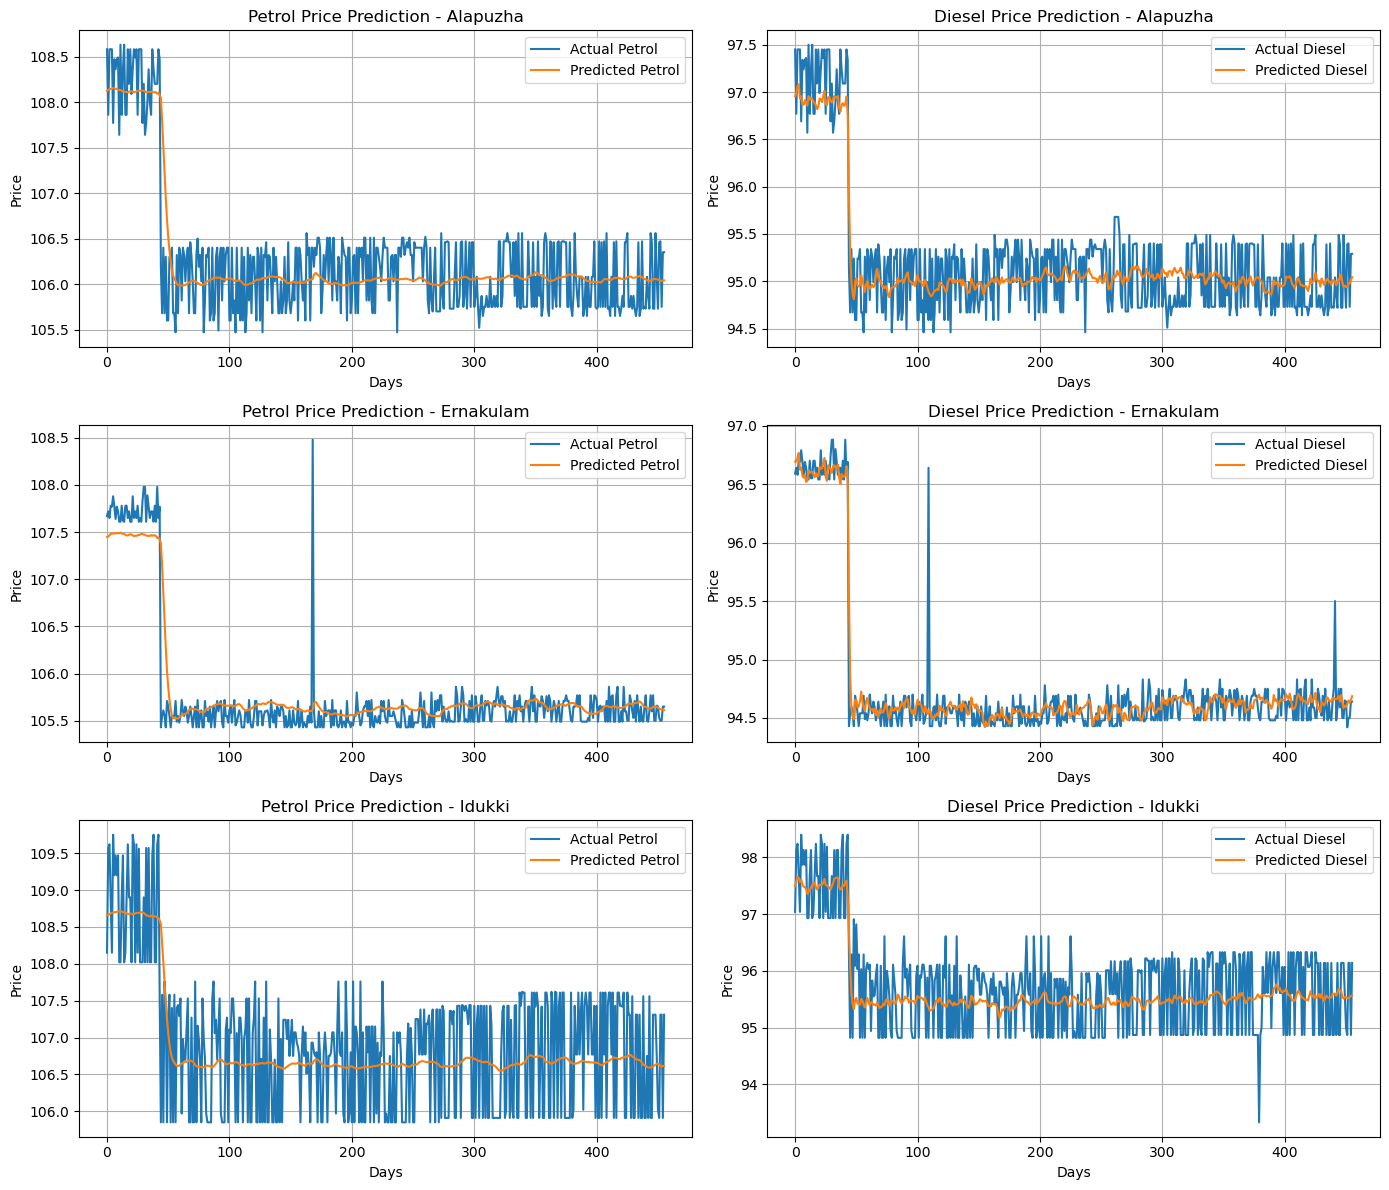

In [408]:
# Plot actual vs predicted for 3 sample districts side by side
sample_districts_petrol = petrol_pivot.columns[:3]
sample_districts_diesel = diesel_pivot.columns[:3]

fig, axes = plt.subplots(3, 2, figsize=(14, 12))
for i, district in enumerate(sample_districts_petrol):
    axes[i, 0].plot(inv_y_petrol[:, i], label='Actual Petrol')
    axes[i, 0].plot(inv_pred_petrol[:, i], label='Predicted Petrol')
    axes[i, 0].set_title(f'Petrol Price Prediction - {district}')
    axes[i, 0].set_xlabel('Days')
    axes[i, 0].set_ylabel('Price')
    axes[i, 0].legend()
    axes[i, 0].grid(True)
for i, district in enumerate(sample_districts_diesel):
    axes[i, 1].plot(inv_y_diesel[:, i], label='Actual Diesel')
    axes[i, 1].plot(inv_pred_diesel[:, i], label='Predicted Diesel')
    axes[i, 1].set_title(f'Diesel Price Prediction - {district}')
    axes[i, 1].set_xlabel('Days')
    axes[i, 1].set_ylabel('Price')
    axes[i, 1].legend()
    axes[i, 1].grid(True)
plt.tight_layout()
plt.show()

In [410]:
# Autoencoder for anomaly detection - Petrol
input_dim = X_petrol.shape[2]
timesteps = X_petrol.shape[1]

inputs = Input(shape=(timesteps, input_dim))
encoded = LSTM(64, activation="relu", return_sequences=False)(inputs)
decoded = RepeatVector(timesteps)(encoded)
decoded = LSTM(64, activation="relu", return_sequences=True)(decoded)
decoded = TimeDistributed(Dense(input_dim))(decoded)

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_petrol, X_petrol, epochs=30, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=5)])

reconstructed = autoencoder.predict(X_petrol)
mse = np.mean(np.power(X_petrol - reconstructed, 2), axis=(1, 2))
threshold = np.percentile(mse, 95)
anomalies = mse > threshold

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 213ms/step - loss: 0.1107 - val_loss: 0.0179
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0403 - val_loss: 0.0099
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - loss: 0.0236 - val_loss: 0.0094
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0201 - val_loss: 0.0088
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0203 - val_loss: 0.0081
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0160 - val_loss: 0.0077
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0156 - val_loss: 0.0076
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0133 - val_loss: 0.0074
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0121 - val_loss: 0.0075
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0128 - val_loss: 0.0076
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0133 - val_loss: 0.0073
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0


🔴 Petrol Price Anomalies Detected:
Date: 2024-03-19, Reconstruction Error: 0.040221
Date: 2024-03-20, Reconstruction Error: 0.042105
Date: 2024-03-21, Reconstruction Error: 0.042781
Date: 2024-03-22, Reconstruction Error: 0.046016
Date: 2024-03-23, Reconstruction Error: 0.046139


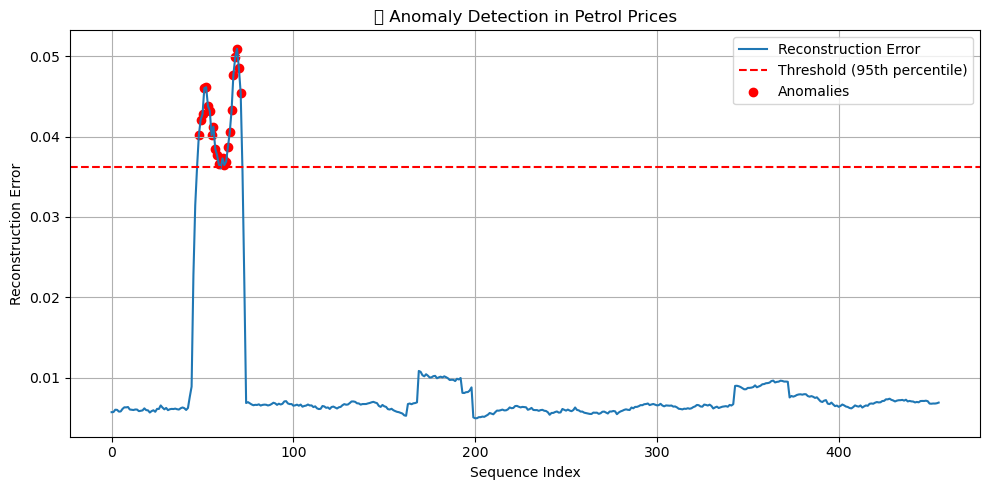

In [412]:
# Show anomalies with district names and dates for petrol
anomaly_indices = np.where(anomalies)[0]

print("\n🔴 Petrol Price Anomalies Detected:")
for idx in anomaly_indices[:5]:  # show up to 5 examples
    date = petrol_pivot.index[idx + seq_len]  # shift by seq_len because y starts from seq_len
    err = mse[idx]
    print(f"Date: {date.date()}, Reconstruction Error: {err:.6f}")

plt.figure(figsize=(10,5))
plt.plot(mse, label="Reconstruction Error")
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold (95th percentile)')
plt.scatter(anomaly_indices, mse[anomaly_indices], color='red', marker='o', label='Anomalies')
plt.title("🔎 Anomaly Detection in Petrol Prices")
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 198ms/step - loss: 0.1270 - val_loss: 0.0316
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0533 - val_loss: 0.0143
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0273 - val_loss: 0.0100
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0224 - val_loss: 0.0089
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - loss: 0.0144 - val_loss: 0.0080
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0128 - val_loss: 0.0073
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0121 - val_loss: 0.0070
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0111 - val_loss: 0.0065
Epoch 9/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - loss: 0.0107 - val_loss: 0.0065
Epoch 10/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - loss: 0.0102 - val_loss: 0.0070
Epoch 11/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0123 - val_loss: 0.0069
Epoch 12/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0

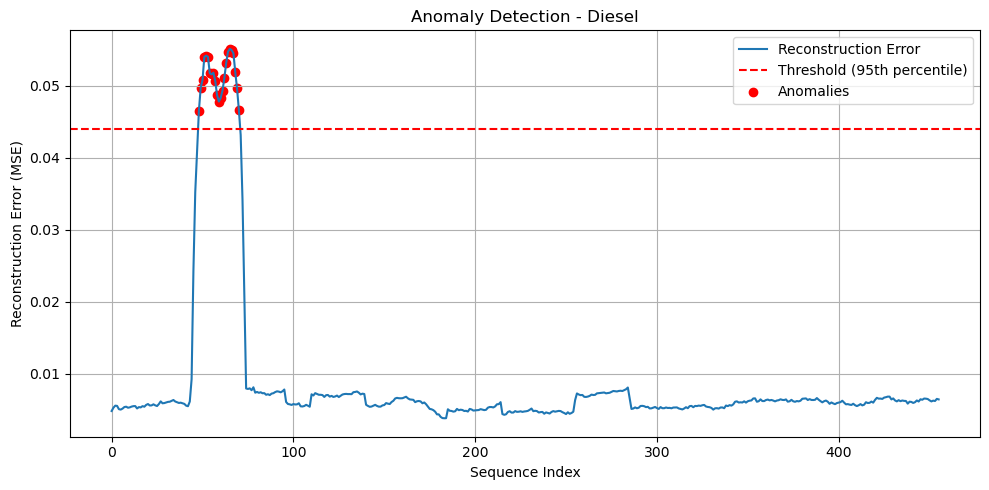

In [414]:
# Autoencoder for Diesel anomaly detection
input_dim_diesel = X_diesel.shape[2]
timesteps_diesel = X_diesel.shape[1]

inputs_diesel = Input(shape=(timesteps_diesel, input_dim_diesel))
encoded_diesel = LSTM(64, activation='relu', return_sequences=False)(inputs_diesel)
decoded_diesel = RepeatVector(timesteps_diesel)(encoded_diesel)
decoded_diesel = LSTM(64, activation='relu', return_sequences=True)(decoded_diesel)
decoded_diesel = TimeDistributed(Dense(input_dim_diesel))(decoded_diesel)

autoencoder_diesel = Model(inputs_diesel, decoded_diesel)
autoencoder_diesel.compile(optimizer='adam', loss='mse')
autoencoder_diesel.fit(X_diesel, X_diesel, epochs=30, batch_size=32, validation_split=0.1, callbacks=[EarlyStopping(patience=5)])

reconstructed_diesel = autoencoder_diesel.predict(X_diesel)
mse_diesel = np.mean(np.power(X_diesel - reconstructed_diesel, 2), axis=(1, 2))
threshold_diesel = np.percentile(mse_diesel, 95)
anomalies_diesel = mse_diesel > threshold_diesel

anomaly_indices_diesel = np.where(anomalies_diesel)[0]

print("\n🔴 Diesel Price Anomalies Detected:")
for idx in anomaly_indices_diesel[:5]:
    date = diesel_pivot.index[idx + seq_len]
    err = mse_diesel[idx]
    print(f"Date: {date.date()}, Reconstruction Error: {err:.6f}")

plt.figure(figsize=(10, 5))
plt.plot(mse_diesel, label="Reconstruction Error")
plt.axhline(y=threshold_diesel, color='r', linestyle='--', label='Threshold (95th percentile)')
plt.scatter(anomaly_indices_diesel, mse_diesel[anomaly_indices_diesel], color='red', marker='o', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection - Diesel")
plt.xlabel("Sequence Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()